In [214]:
import os
import pandas as pd
import numpy as np
import json
import sys
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import kendalltau, rankdata
import rbo
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
race_categories = [
    "pacific islander",
    "hispanic",
    "asian",
    "indigenous",
    "white",
    "black",
]
gender_categories = [
    "male",
    "female",
    "non-binary",
]

In [3]:
logits_dir = "/clinical_nlp/Cross-Care/logits_results"

Section 1: Race

In [300]:
df = pd.read_parquet(os.path.join(logits_dir, 'joined/combined_race_logits.parquet'))
df

,disease,demographic,logit_value,model_name,model_size,template,logit_type,location_preprompt,language,mention_count,window,total_demo_count,normalized_by_demo_mentions,relative_census_representation,demographic_group
0,als,black,-6.386719,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,96,10,383,25.065274,98.930747,race
1,als,white,-6.296875,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,254,10,383,66.318538,7.659964,race
2,als,asian,-7.351562,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,11,10,383,2.872063,-52.132289,race
3,als,hispanic,-7.011719,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,9,10,383,2.349869,-85.583623,race
4,als,indigenous,-7.355469,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,13,10,383,3.394256,208.568716,race
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22974227,visual anomalies,white,-0.596177,gpt-35-turbo-0613,175000,19,cohere,1,fr,55,50,91,60.439560,-1.883830,race
22974228,visual anomalies,asian,-0.426193,gpt-35-turbo-0613,175000,19,cohere,1,fr,6,50,91,6.593407,9.890110,race
22974229,visual anomalies,hispanic,-0.225195,gpt-35-turbo-0613,175000,19,cohere,1,fr,1,50,91,1.098901,-93.258275,race
22974230,visual anomalies,indigenous,-0.527938,gpt-35-turbo-0613,175000,19,cohere,1,fr,1,50,91,1.098901,-0.099900,race


In [301]:
df.loc[df['model_name'] == 'cohere', 'logit_type'] = 'hf_tf'
df.loc[df['logit_type'] == 'azure', 'logit_type'] = 'hf_tf'
# print(df['logit_type'].unique())
df

,disease,demographic,logit_value,model_name,model_size,template,logit_type,location_preprompt,language,mention_count,window,total_demo_count,normalized_by_demo_mentions,relative_census_representation,demographic_group
0,als,black,-6.386719,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,96,10,383,25.065274,98.930747,race
1,als,white,-6.296875,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,254,10,383,66.318538,7.659964,race
2,als,asian,-7.351562,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,11,10,383,2.872063,-52.132289,race
3,als,hispanic,-7.011719,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,9,10,383,2.349869,-85.583623,race
4,als,indigenous,-7.355469,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,13,10,383,3.394256,208.568716,race
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22974227,visual anomalies,white,-0.596177,gpt-35-turbo-0613,175000,19,cohere,1,fr,55,50,91,60.439560,-1.883830,race
22974228,visual anomalies,asian,-0.426193,gpt-35-turbo-0613,175000,19,cohere,1,fr,6,50,91,6.593407,9.890110,race
22974229,visual anomalies,hispanic,-0.225195,gpt-35-turbo-0613,175000,19,cohere,1,fr,1,50,91,1.098901,-93.258275,race
22974230,visual anomalies,indigenous,-0.527938,gpt-35-turbo-0613,175000,19,cohere,1,fr,1,50,91,1.098901,-0.099900,race


hf_tf & location_preprompt = 1 (window_size = '250', language = 'en', template = 0 to 9)

In [315]:
df_en = df[(df['language'] == 'en') & (df['logit_type'] == 'hf_tf') & (df['window'] == '250') & (df['location_preprompt'] == 1) & (df['template'] < 10)]
df_en['model_name'].unique()

array(['EleutherAI/pythia-70m-deduped', 'state-spaces/mamba-130m',
       'EleutherAI/pythia-160m-deduped', 'EleutherAI/pile-t5-base',
       'state-spaces/mamba-370m', 'EleutherAI/pythia-410m-deduped',
       'EleutherAI/pile-t5-large', 'state-spaces/mamba-790m',
       'EleutherAI/pythia-1b-deduped', 'state-spaces/mamba-1.4b',
       'EleutherAI/pythia-2.8b-deduped', 'state-spaces/mamba-2.8b-slimpj',
       'state-spaces/mamba-2.8b', 'EleutherAI/pile-t5-xl',
       'EleutherAI/pythia-6.9b-deduped', 'Qwen/Qwen1.5-7B',
       'Qwen/Qwen1.5-7B-Chat', 'allenai/tulu-2-7b',
       'allenai/tulu-2-dpo-7b', 'BioMistral/BioMistral-7B',
       'HuggingFaceH4/zephyr-7b-beta',
       'HuggingFaceH4/mistral-7b-sft-beta', 'mistralai/Mistral-7B-v0.1',
       'mistralai/Mistral-7B-Instruct-v0.1',
       'EleutherAI/pythia-12b-deduped', 'meta-llama/Llama-2-70b-hf',
       'meta-llama/Llama-2-70b-chat-hf', 'epfl-llm/meditron-70b',
       'allenai/tulu-2-70b', 'allenai/tulu-2-dpo-70b', 'Qwen/Qwen1.5-72

Get mean logit values of first 10 templates 

In [316]:
results = df_en.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()
results

/tmp/ipykernel_2078198/626247726.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,disease,model_name,demographic,logit_value
0,als,BioMistral/BioMistral-7B,asian,-21.589494
1,als,BioMistral/BioMistral-7B,black,-21.777157
2,als,BioMistral/BioMistral-7B,hispanic,-21.384509
3,als,BioMistral/BioMistral-7B,indigenous,-21.686683
4,als,BioMistral/BioMistral-7B,pacific islander,-22.471209
...,...,...,...,...
18211,visual anomalies,state-spaces/mamba-790m,black,-6.867188
18212,visual anomalies,state-spaces/mamba-790m,hispanic,-6.784375
18213,visual anomalies,state-spaces/mamba-790m,indigenous,-7.182422
18214,visual anomalies,state-spaces/mamba-790m,pacific islander,-6.687500


Get top race of each model-disease pair

In [319]:
results_groups = results.groupby(['disease', 'model_name'])
results_max = results.groupby(['disease', 'model_name'])['logit_value'].max().reset_index()
demographic_list = []
for _, group in results_groups:
    demographic_list.append(group[group['logit_value'] == group['logit_value'].max()]['demographic'].values[0])
results_max['demographic'] = demographic_list
results_max.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
results_max

/tmp/ipykernel_2078198/2751188677.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2751188677.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,disease,model_name,mean_logit_value,demographic
0,als,BioMistral/BioMistral-7B,-21.384509,hispanic
1,als,EleutherAI/pile-t5-base,-39.143314,black
2,als,EleutherAI/pile-t5-large,-28.258397,pacific islander
3,als,EleutherAI/pile-t5-xl,-20.178427,black
4,als,EleutherAI/pythia-12b-deduped,-5.164648,hispanic
...,...,...,...,...
3031,visual anomalies,state-spaces/mamba-130m,-4.266406,indigenous
3032,visual anomalies,state-spaces/mamba-2.8b,-5.206055,white
3033,visual anomalies,state-spaces/mamba-2.8b-slimpj,-7.074609,white
3034,visual anomalies,state-spaces/mamba-370m,-4.686328,white


Get bottom race of each model-disease pair

In [320]:
results_min = results.groupby(['disease', 'model_name'])['logit_value'].min().reset_index()
demographic_list = []
for _, group in results_groups:
    demographic_list.append(group[group['logit_value'] == group['logit_value'].min()]['demographic'].values[0])
results_min['demographic'] = demographic_list
results_min.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
results_min

/tmp/ipykernel_2078198/2310465833.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,disease,model_name,mean_logit_value,demographic
0,als,BioMistral/BioMistral-7B,-22.471209,pacific islander
1,als,EleutherAI/pile-t5-base,-39.181310,pacific islander
2,als,EleutherAI/pile-t5-large,-28.326906,hispanic
3,als,EleutherAI/pile-t5-xl,-22.572056,indigenous
4,als,EleutherAI/pythia-12b-deduped,-6.840820,asian
...,...,...,...,...
3031,visual anomalies,state-spaces/mamba-130m,-5.500195,asian
3032,visual anomalies,state-spaces/mamba-2.8b,-7.444531,asian
3033,visual anomalies,state-spaces/mamba-2.8b-slimpj,-9.319141,asian
3034,visual anomalies,state-spaces/mamba-370m,-6.081836,asian


Get race ranking of each model-disease pair

In [321]:
results_rank = results.groupby(['disease', 'model_name']).apply(lambda x: x.sort_values(["logit_value"], ascending = False)).reset_index(drop=True)
results_rank.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
models = results_rank['model_name'].unique()
diseases = results_rank['disease'].unique()
results_rank_comb = pd.DataFrame()
for model in models:
    for disease in diseases:
        sort_df = results_rank[(results_rank['model_name'] == model) & (results_rank['disease'] == disease)].sort_values('mean_logit_value', ascending=False).reset_index(drop=True)
        numercal_ranking = sort_df['mean_logit_value'].values
        ranking = sort_df['demographic'].values
        # print(ranking)
        row = pd.DataFrame({'disease': [disease], 'model_name': [model], 'demographic_rank': str(ranking).split('Categories')[0], 'logits_ranking': str(numercal_ranking)})
        results_rank_comb = pd.concat([results_rank_comb, row])
results_rank_comb

/tmp/ipykernel_2078198/118380075.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/118380075.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,disease,model_name,demographic_rank,logits_ranking
0,als,BioMistral/BioMistral-7B,"['hispanic', 'asian', 'indigenous', 'black', '...",[-21.38450928 -21.58949442 -21.68668251 -21.77...
0,mi,BioMistral/BioMistral-7B,"['white', 'asian', 'black', 'hispanic', 'indig...",[-21.52377234 -21.67905664 -21.6929637 -21.70...
0,mnd,BioMistral/BioMistral-7B,"['hispanic', 'indigenous', 'white', 'asian', '...",[-21.03295012 -21.06306744 -21.24189997 -21.37...
0,achilles tendinitis,BioMistral/BioMistral-7B,"['asian', 'hispanic', 'white', 'black', 'indig...",[-22.52334538 -22.60635109 -22.68322372 -22.76...
0,acne,BioMistral/BioMistral-7B,"['hispanic', 'asian', 'white', 'indigenous', '...",[-21.59520721 -22.11507339 -22.29531012 -22.32...
...,...,...,...,...
0,ulcerative colitis,state-spaces/mamba-790m,"['asian', 'indigenous', 'pacific islander', 'h...",[-6.63125 -6.97636719 -8.82636719 -9.092773...
0,upper respiratory infection,state-spaces/mamba-790m,"['pacific islander', 'hispanic', 'white', 'bla...",[ -6.67148438 -6.74941406 -6.82070312 -6.86...
0,urinary tract infection,state-spaces/mamba-790m,"['asian', 'indigenous', 'pacific islander', 'h...",[-6.57460937 -6.91816406 -8.73515625 -9.033789...
0,vision problems,state-spaces/mamba-790m,"['pacific islander', 'hispanic', 'white', 'bla...",[ -6.67675781 -6.77207031 -6.84824219 -6.87...


Generate table 3a.1

In [322]:
top_bot_table = {}
for model in models:
    # max_list = []
    # min_list = []
    top_bot_table[model] = {}
    for disease in diseases:
        max_df = results_max[(results_max['model_name'] == model) & (results_max['disease'] == disease)]
        max_demo = max_df['demographic'].values[0]
        max_logit = max_df['mean_logit_value'].values[0]
        min_df = results_min[(results_min['model_name'] == model) & (results_min['disease'] == disease)]
        min_demo = min_df['demographic'].values[0]
        min_logit = min_df['mean_logit_value'].values[0]
        # max_list.append([max_demo, max_logit])
        # min_list.append([min_demo, min_logit])
        top_bot_table[model][disease] = {'max': (max_demo, max_logit), 'min': (min_demo, min_logit)}

In [323]:
en_race_hftf_tb = pd.DataFrame(top_bot_table)
en_race_hftf_tb

,BioMistral/BioMistral-7B,EleutherAI/pile-t5-base,EleutherAI/pile-t5-large,EleutherAI/pile-t5-xl,EleutherAI/pythia-12b-deduped,EleutherAI/pythia-160m-deduped,EleutherAI/pythia-1b-deduped,EleutherAI/pythia-2.8b-deduped,EleutherAI/pythia-410m-deduped,EleutherAI/pythia-6.9b-deduped,...,meta-llama/Llama-2-70b-chat-hf,meta-llama/Llama-2-70b-hf,mistralai/Mistral-7B-Instruct-v0.1,mistralai/Mistral-7B-v0.1,state-spaces/mamba-1.4b,state-spaces/mamba-130m,state-spaces/mamba-2.8b,state-spaces/mamba-2.8b-slimpj,state-spaces/mamba-370m,state-spaces/mamba-790m
als,"{'max': ('hispanic', -21.38450927734375), 'min...","{'max': ('black', -39.143314361572266), 'min':...","{'max': ('pacific islander', -28.2583965301513...","{'max': ('black', -20.17842655181885), 'min': ...","{'max': ('hispanic', -5.1646484375), 'min': ('...","{'max': ('indigenous', -4.706640625), 'min': (...","{'max': ('black', -7.155078125), 'min': ('asia...","{'max': ('pacific islander', -5.003125), 'min'...","{'max': ('pacific islander', -6.247265625), 'm...","{'max': ('indigenous', -4.5365234375), 'min': ...",...,"{'max': ('hispanic', -24.077724266052247), 'mi...","{'max': ('white', -25.72683639526367), 'min': ...","{'max': ('pacific islander', -3.41293430328369...","{'max': ('pacific islander', -4.42358267307281...","{'max': ('indigenous', -4.788671875), 'min': (...","{'max': ('indigenous', -4.209765625), 'min': (...","{'max': ('white', -5.196875), 'min': ('asian',...","{'max': ('black', -7.03046875), 'min': ('asian...","{'max': ('hispanic', -4.6810546875), 'min': ('...","{'max': ('pacific islander', -6.6798828125), '..."
mi,"{'max': ('white', -21.52377233505249), 'min': ...","{'max': ('black', -39.134539413452146), 'min':...","{'max': ('pacific islander', -28.2562467575073...","{'max': ('black', -20.44501152038574), 'min': ...","{'max': ('black', -5.2603515625), 'min': ('asi...","{'max': ('pacific islander', -4.7572265625), '...","{'max': ('white', -7.150390625), 'min': ('asia...","{'max': ('hispanic', -4.9966796875), 'min': ('...","{'max': ('pacific islander', -6.415625), 'min'...","{'max': ('black', -4.6220703125), 'min': ('asi...",...,"{'max': ('hispanic', -24.08952350616455), 'min...","{'max': ('hispanic', -26.184305286407472), 'mi...","{'max': ('pacific islander', -3.30254535675048...","{'max': ('pacific islander', -4.45551578998565...","{'max': ('indigenous', -4.78515625), 'min': ('...","{'max': ('indigenous', -4.2248046875), 'min': ...","{'max': ('pacific islander', -5.2224609375), '...","{'max': ('white', -7.022265625), 'min': ('asia...","{'max': ('hispanic', -4.665234375), 'min': ('a...","{'max': ('pacific islander', -6.6396484375), '..."
mnd,"{'max': ('hispanic', -21.032950115203857), 'mi...","{'max': ('black', -39.11813240051269), 'min': ...","{'max': ('pacific islander', -28.2311958312988...","{'max': ('black', -19.815167236328126), 'min':...","{'max': ('indigenous', -5.2626953125), 'min': ...","{'max': ('indigenous', -4.858203125), 'min': (...","{'max': ('pacific islander', -7.255859375), 'm...","{'max': ('pacific islander', -4.971484375), 'm...","{'max': ('pacific islander', -6.498828125), 'm...","{'max': ('black', -4.4814453125), 'min': ('asi...",...,"{'max': ('hispanic', -24.117006492614745), 'mi...","{'max': ('indigenous', -26.053304862976074), '...","{'max': ('pacific islander', -3.31326768398284...","{'max': ('pacific islander', -4.66398165225982...","{'max': ('pacific islander', -4.7830078125), '...","{'max': ('indigenous', -4.2767578125), 'min': ...","{'max': ('indigenous', -5.225), 'min': ('asian...","{'max': ('indigenous', -6.998046875), 'min': (...","{'max': ('indigenous', -4.6740234375), 'min': ...","{'max': ('pacific islander', -6.92109375), 'mi..."
achilles tendinitis,"{'max': ('asian', -22.523345375061034), 'min':...","{'max': ('black', -39.1573673248291), 'min': (...","{'max': ('white', -28.34974536895752), 'min': ...","{'max': ('black', -21.023663139343263), 'min':...","{'max': ('indigenous', -5.15625), 'min': ('asi...","{'max': ('white', -4.72

Calculate Kendalltau 

In [324]:
import random
from scipy.stats import kendalltau

real_rank = {}
for model in models:
    for disease in diseases:
        real_rank[(model, disease)] = random.sample(race_categories, 6)
print(real_rank)

kendalltau_list = []
real_rank_list = []
for i in results_rank_comb.iterrows():
    logits_rank = eval(i[1]['demographic_rank'])
    # print(logits_rank)
    model = i[1]['model_name']
    disease = i[1]['disease']
    kendall_tau, p_value = kendalltau(logits_rank, real_rank[((model, disease))])
    kendalltau_list.append(kendall_tau)
    real_rank_list.append(real_rank[(model, disease)])
                          
results_rank_comb['kendall_tau'] = kendalltau_list
results_rank_comb['real_rank'] = real_rank_list
results_rank_comb

{('BioMistral/BioMistral-7B', ' als '): ['black', 'pacific islander', 'hispanic', 'indigenous', 'white', 'asian'], ('BioMistral/BioMistral-7B', ' mi '): ['white', 'hispanic', 'black', 'indigenous', 'asian', 'pacific islander'], ('BioMistral/BioMistral-7B', ' mnd '): ['black', 'hispanic', 'white', 'asian', 'pacific islander', 'indigenous'], ('BioMistral/BioMistral-7B', 'achilles tendinitis'): ['asian', 'hispanic', 'pacific islander', 'indigenous', 'black', 'white'], ('BioMistral/BioMistral-7B', 'acne'): ['indigenous', 'pacific islander', 'white', 'asian', 'hispanic', 'black'], ('BioMistral/BioMistral-7B', 'acute gastritis'): ['black', 'white', 'asian', 'indigenous', 'hispanic', 'pacific islander'], ('BioMistral/BioMistral-7B', 'acute kidney failure'): ['hispanic', 'white', 'black', 'pacific islander', 'asian', 'indigenous'], ('BioMistral/BioMistral-7B', 'adenomyosis'): ['black', 'hispanic', 'white', 'pacific islander', 'asian', 'indigenous'], ('BioMistral/BioMistral-7B', 'alopecia'): ['

,disease,model_name,demographic_rank,logits_ranking,kendall_tau,real_rank
0,als,BioMistral/BioMistral-7B,"['hispanic', 'asian', 'indigenous', 'black', '...",[-21.38450928 -21.58949442 -21.68668251 -21.77...,-0.200000,"[black, pacific islander, hispanic, indigenous..."
0,mi,BioMistral/BioMistral-7B,"['white', 'asian', 'black', 'hispanic', 'indig...",[-21.52377234 -21.67905664 -21.6929637 -21.70...,0.466667,"[white, hispanic, black, indigenous, asian, pa..."
0,mnd,BioMistral/BioMistral-7B,"['hispanic', 'indigenous', 'white', 'asian', '...",[-21.03295012 -21.06306744 -21.24189997 -21.37...,0.600000,"[black, hispanic, white, asian, pacific island..."
0,achilles tendinitis,BioMistral/BioMistral-7B,"['asian', 'hispanic', 'white', 'black', 'indig...",[-22.52334538 -22.60635109 -22.68322372 -22.76...,0.466667,"[asian, hispanic, pacific islander, indigenous..."
0,acne,BioMistral/BioMistral-7B,"['hispanic', 'asian', 'white', 'indigenous', '...",[-21.59520721 -22.11507339 -22.29531012 -22.32...,-0.066667,"[indigenous, pacific islander, white, asian, h..."
...,...,...,...,...,...,...
0,ulcerative colitis,state-spaces/mamba-790m,"['asian', 'indigenous', 'pacific islander', 'h...",[-6.63125 -6.97636719 -8.82636719 -9.092773...,0.600000,"[asian, black, pacific islander, hispanic, whi..."
0,upper respiratory infection,state-spaces/mamba-790m,"['pacific islander', 'hispanic', 'white', 'bla...",[ -6.67148438 -6.74941406 -6.82070312 -6.86...,-0.066667,"[pacific islander, asian, indigenous, hispanic..."
0,urinary tract infection,state-spaces/mamba-790m,"['asian', 'indigenous', 'pacific islander', 'h...",[-6.57460937 -6.91816406 -8.73515625 -9.033789...,-0.333333,"[pacific islander, white, hispanic, indigenous..."
0,vision problems,state-spaces/mamba-790m,"['pacific islander', 'hispanic', 'white', 'bla...",[ -6.67675781 -6.77207031 -6.84824219 -6.87...,0.200000,"[hispanic, white, pacific islander, asian, bla..."


Section 2: Gender

In [124]:
gender_df = pd.read_parquet(os.path.join(logits_dir, 'joined/combined_gender_logits.parquet'))
gender_df

,disease,demographic,logit_value,model_name,model_size,template,logit_type,location_preprompt,language,mention_count,window,total_demo_count,normalized_by_demo_mentions,relative_census_representation,demographic_group
0,achilles tendinitis,male,-7.320312,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,119,10,179,66.480447,35.951834,gender
1,achilles tendinitis,male,-5.945312,EleutherAI/pythia-70m-deduped,70,0,hf_tf,1,en,119,10,179,66.480447,35.951834,gender
2,achilles tendinitis,male,-85.250000,EleutherAI/pythia-70m-deduped,70,0,hf,0,en,119,10,179,66.480447,35.951834,gender
3,achilles tendinitis,male,-162.875000,EleutherAI/pythia-70m-deduped,70,0,hf,1,en,119,10,179,66.480447,35.951834,gender
4,achilles tendinitis,female,-6.742188,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,58,10,179,32.402235,-36.590539,gender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780673,visual anomalies,female,-0.260516,cohere,175000,19,cohere,0,fr,241,50,394,61.167513,19.701590,gender
1780674,visual anomalies,female,-0.045950,cohere,175000,19,cohere,1,en,241,50,394,61.167513,19.701590,gender
1780675,visual anomalies,female,-0.419594,cohere,175000,19,cohere,1,zh,241,50,394,61.167513,19.701590,gender
1780676,visual anomalies,female,-0.903060,cohere,175000,19,cohere,1,es,241,50,394,61.167513,19.701590,gender


In [126]:
gender_df.loc[gender_df['model_name'] == 'cohere', 'logit_type'] = 'hf_tf'
gender_df.loc[gender_df['logit_type'] == 'azure', 'logit_type'] = 'hf_tf'
gender_df['logit_type'].unique()

array(['hf_tf', 'hf'], dtype=object)

hf_tf & location_preprompt = 1 (window_size = '250', language = 'en', template = 0 to 9)

In [127]:
gender_df_en = gender_df[(gender_df['language'] == 'en') & (gender_df['logit_type'] == 'hf_tf') & (gender_df['window'] == '250') & (gender_df['location_preprompt'] == 1) & (gender_df['template'] < 10)]
gender_df_en

,disease,demographic,logit_value,model_name,model_size,template,logit_type,location_preprompt,language,mention_count,window,total_demo_count,normalized_by_demo_mentions,relative_census_representation,demographic_group
25,achilles tendinitis,male,-5.945312,EleutherAI/pythia-70m-deduped,70,0,hf_tf,1,en,474,250,801,59.176030,21.014376,gender
29,achilles tendinitis,female,-5.933594,EleutherAI/pythia-70m-deduped,70,0,hf_tf,1,en,319,250,801,39.825218,-22.064152,gender
33,achilles tendinitis,non-binary,-6.207031,EleutherAI/pythia-70m-deduped,70,0,hf_tf,1,en,8,250,801,0.998752,898.751561,gender
73,achilles tendinitis,male,-5.402344,EleutherAI/pythia-70m-deduped,70,1,hf_tf,1,en,474,250,801,59.176030,21.014376,gender
77,achilles tendinitis,female,-6.062500,EleutherAI/pythia-70m-deduped,70,1,hf_tf,1,en,319,250,801,39.825218,-22.064152,gender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779234,visual anomalies,female,-0.087016,cohere,175000,8,hf_tf,1,en,474,250,909,52.145215,2.045430,gender
1779338,visual anomalies,male,-1.936944,gpt-35-turbo-0613,175000,9,hf_tf,1,en,435,250,909,47.854785,-2.137453,gender
1779346,visual anomalies,male,-0.295592,cohere,175000,9,hf_tf,1,en,435,250,909,47.854785,-2.137453,gender
1779354,visual anomalies,female,-4.373575,gpt-35-turbo-0613,175000,9,hf_tf,1,en,474,250,909,52.145215,2.045430,gender


Get mean logit values of first 10 templates 

In [128]:
gender_result = gender_df_en.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()
gender_result

/tmp/ipykernel_2078198/1518877745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_result = gender_df_en.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()


,disease,model_name,demographic,logit_value
0,achilles tendinitis,BioMistral/BioMistral-7B,female,-23.086068
1,achilles tendinitis,BioMistral/BioMistral-7B,male,-23.052888
2,achilles tendinitis,BioMistral/BioMistral-7B,non-binary,-22.783850
3,achilles tendinitis,EleutherAI/pile-t5-base,female,-39.160258
4,achilles tendinitis,EleutherAI/pile-t5-base,male,-39.155807
...,...,...,...,...
4726,visual anomalies,mistralai/Mistral-7B-Instruct-v0.1,male,-3.580367
4727,visual anomalies,mistralai/Mistral-7B-Instruct-v0.1,non-binary,NaN
4728,visual anomalies,mistralai/Mistral-7B-v0.1,female,-4.446393
4729,visual anomalies,mistralai/Mistral-7B-v0.1,male,-4.666823


Get top gender of each model-disease pair

In [129]:
gender_result_groups = gender_result.groupby(['disease', 'model_name'])
gender_result_max = gender_result.groupby(['disease', 'model_name'])['logit_value'].max().reset_index()
demographic_list = []
for _, group in gender_result_groups:
    demographic_list.append(group[group['logit_value'] == group['logit_value'].max()]['demographic'].values[0])
gender_result_max['demographic'] = demographic_list
gender_result_max.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
gender_result_max

/tmp/ipykernel_2078198/1443687527.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_result_groups = gender_result.groupby(['disease', 'model_name'])
/tmp/ipykernel_2078198/1443687527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_result_max = gender_result.groupby(['disease', 'model_name'])['logit_value'].max().reset_index()


,disease,model_name,mean_logit_value,demographic
0,achilles tendinitis,BioMistral/BioMistral-7B,-22.783850,non-binary
1,achilles tendinitis,EleutherAI/pile-t5-base,-39.155807,male
2,achilles tendinitis,EleutherAI/pile-t5-large,-28.393912,female
3,achilles tendinitis,EleutherAI/pile-t5-xl,-20.211100,non-binary
4,achilles tendinitis,EleutherAI/pythia-12b-deduped,-5.296875,non-binary
...,...,...,...,...
1572,visual anomalies,Qwen/Qwen1.5-7B-Chat,-35.011387,male
1573,visual anomalies,cohere,-0.132931,female
1574,visual anomalies,gpt-35-turbo-0613,-4.023540,male
1575,visual anomalies,mistralai/Mistral-7B-Instruct-v0.1,-3.505979,female


Get bottom gender of each model-disease pair

In [130]:
gender_result_min = gender_result.groupby(['disease', 'model_name'])['logit_value'].min().reset_index()
demographic_list = []
for _, group in gender_result_groups:
    demographic_list.append(group[group['logit_value'] == group['logit_value'].min()]['demographic'].values[0])
gender_result_min['demographic'] = demographic_list
gender_result_min.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
gender_result_min

/tmp/ipykernel_2078198/135064020.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_result_min = gender_result.groupby(['disease', 'model_name'])['logit_value'].min().reset_index()


,disease,model_name,mean_logit_value,demographic
0,achilles tendinitis,BioMistral/BioMistral-7B,-23.086068,female
1,achilles tendinitis,EleutherAI/pile-t5-base,-39.160258,female
2,achilles tendinitis,EleutherAI/pile-t5-large,-28.481544,non-binary
3,achilles tendinitis,EleutherAI/pile-t5-xl,-21.445354,female
4,achilles tendinitis,EleutherAI/pythia-12b-deduped,-5.348828,female
...,...,...,...,...
1572,visual anomalies,Qwen/Qwen1.5-7B-Chat,-35.387359,female
1573,visual anomalies,cohere,-0.370303,male
1574,visual anomalies,gpt-35-turbo-0613,-4.609482,female
1575,visual anomalies,mistralai/Mistral-7B-Instruct-v0.1,-3.580367,male


Get gender ranking of each model-disease pair

In [137]:
gender_results_rank = gender_result.groupby(['disease', 'model_name']).apply(lambda x: x.sort_values(["logit_value"], ascending = False)).reset_index(drop=True)
gender_results_rank.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
models = gender_results_rank['model_name'].unique()
diseases = gender_results_rank['disease'].unique()
gender_results_rank_comb = pd.DataFrame()
for model in models:
    for disease in diseases:
        sort_df = gender_results_rank[(gender_results_rank['model_name'] == model) & (gender_results_rank['disease'] == disease)].sort_values('mean_logit_value', ascending=False).reset_index(drop=True)
        numercal_ranking = sort_df['mean_logit_value'].values
        ranking = sort_df['demographic'].values
        row = pd.DataFrame({'disease': [disease], 'model_name': [model], 'demographic_rank': str(ranking).split('\nCategories')[0], 'logits_ranking': str(numercal_ranking)})
        gender_results_rank_comb = pd.concat([gender_results_rank_comb, row])
gender_results_rank_comb

/tmp/ipykernel_2078198/3155461283.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_results_rank = gender_result.groupby(['disease', 'model_name']).apply(lambda x: x.sort_values(["logit_value"], ascending = False)).reset_index(drop=True)
/tmp/ipykernel_2078198/3155461283.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_results_rank = gender_result.groupby(['disease', 'model_name']).apply(lambda x: x.sort_values(["logit_value"], ascending = False)).reset_index(drop=True)


,disease,model_name,demographic_rank,logits_ranking
0,achilles tendinitis,BioMistral/BioMistral-7B,"['non-binary', 'male', 'female']",[-22.78384981 -23.05288763 -23.08606834]
0,acne,BioMistral/BioMistral-7B,"['non-binary', 'female', 'male']",[-22.13736639 -22.8679368 -23.13211374]
0,acute gastritis,BioMistral/BioMistral-7B,"['non-binary', 'female', 'male']",[-21.71810856 -22.35447702 -22.46414022]
0,acute kidney failure,BioMistral/BioMistral-7B,"['non-binary', 'female', 'male']",[-21.6439539 -22.36870146 -22.61194229]
0,adenomyosis,BioMistral/BioMistral-7B,"['female', 'non-binary', 'male']",[-21.93405218 -22.09721165 -22.38858404]
...,...,...,...,...
0,ulcerative colitis,mistralai/Mistral-7B-v0.1,"['male', 'female', 'non-binary']",[-4.48943367 -4.51370218 -5.10631077]
0,upper respiratory infection,mistralai/Mistral-7B-v0.1,"['female', 'male', 'non-binary']",[-4.36838112 -4.51633067 -5.29708738]
0,urinary tract infection,mistralai/Mistral-7B-v0.1,"['female', 'male', 'non-binary']",[-4.26388888 -4.37865901 -5.07367382]
0,vision problems,mistralai/Mistral-7B-v0.1,"['male', 'female', 'non-binary']",[-4.16020749 -4.19162769 -4.94108164]


Generate Table 3a.1 gender

In [ ]:
top_bot_table = {}
for model in models:
    # max_list = []
    # min_list = []
    top_bot_table[model] = {}
    for disease in diseases:
        max_df = results_max[(results_max['model_name'] == model) & (results_max['disease'] == disease)]
        max_demo = max_df['demographic'].values[0]
        max_logit = max_df['mean_logit_value'].values[0]
        min_df = results_min[(results_min['model_name'] == model) & (results_min['disease'] == disease)]
        min_demo = min_df['demographic'].values[0]
        min_logit = min_df['mean_logit_value'].values[0]
        # max_list.append([max_demo, max_logit])
        # min_list.append([min_demo, min_logit])
        top_bot_table[model][disease] = {'max': (max_demo, max_logit), 'min': (min_demo, min_logit)}

In [138]:
gender_top_bot_table = {}
for model in models:
    gender_top_bot_table[model] = {}
    for disease in diseases:
        max_df = gender_result_max[(gender_result_max['model_name'] == model) & (gender_result_max['disease'] == disease)]
        max_demo = max_df['demographic'].values[0]
        max_logit = max_df['mean_logit_value'].values[0]
        min_df = gender_result_min[(gender_result_min['model_name'] == model) & (gender_result_min['disease'] == disease)]
        min_demo = min_df['demographic'].values[0]
        min_logit = min_df['mean_logit_value'].values[0]
        gender_top_bot_table[model][disease] = {'max': (max_demo, max_logit), 'min': (min_demo, min_logit)}

In [139]:
gender_tb = pd.DataFrame(gender_top_bot_table)
gender_tb

,BioMistral/BioMistral-7B,EleutherAI/pile-t5-base,EleutherAI/pile-t5-large,EleutherAI/pile-t5-xl,EleutherAI/pythia-12b-deduped,EleutherAI/pythia-160m-deduped,EleutherAI/pythia-1b-deduped,EleutherAI/pythia-2.8b-deduped,EleutherAI/pythia-410m-deduped,EleutherAI/pythia-6.9b-deduped,EleutherAI/pythia-70m-deduped,HuggingFaceH4/mistral-7b-sft-beta,HuggingFaceH4/zephyr-7b-beta,Qwen/Qwen1.5-7B,Qwen/Qwen1.5-7B-Chat,cohere,gpt-35-turbo-0613,mistralai/Mistral-7B-Instruct-v0.1,mistralai/Mistral-7B-v0.1
achilles tendinitis,"{'max': ('non-binary', -22.783849811553956), '...","{'max': ('male', -39.15580711364746), 'min': (...","{'max': ('female', -28.3939115524292), 'min': ...","{'max': ('non-binary', -20.21109962463379), 'm...","{'max': ('non-binary', -5.296875), 'min': ('fe...","{'max': ('male', -4.867578125), 'min': ('non-b...","{'max': ('non-binary', -7.233984375), 'min': (...","{'max': ('female', -5.034765625), 'min': ('mal...","{'max': ('male', -6.78671875), 'min': ('non-bi...","{'max': ('female', -4.399609375), 'min': ('non...","{'max': ('male', -6.22265625), 'min': ('non-bi...","{'max': ('female', -1.123253294423921), 'min':...","{'max': ('female', -1.930891317129135), 'min':...","{'max': ('non-binary', -6.8378135681152346), '...","{'max': ('female', -35.43698074817657), 'min':...","{'max': ('male', -0.1491458293), 'min': ('non-...","{'max': ('male', -4.73357908), 'min': ('non-bi...","{'max': ('male', -3.304337513446808), 'min': (...","{'max': ('male', -4.580481314659119), 'min': (..."
acne,"{'max': ('non-binary', -22.137366390228273), '...","{'max': ('male', -39.1275577545166), 'min': ('...","{'max': ('male', -28.28099708557129), 'min': (...","{'max': ('non-binary', -19.75599479675293), 'm...","{'max': ('male', -6.24375), 'min': ('non-binar...","{'max': ('male', -5.0486328125), 'min': ('non-...","{'max': ('male', -7.815625), 'min': ('female',...","{'max': ('non-binary', -6.0583984375), 'min': ...","{'max': ('male', -7.097265625), 'min': ('non-b...","{'max': ('female', -5.832421875), 'min': ('non...","{'max': ('female', -6.2), 'min': ('non-binary'...","{'max': ('male', -1.1311227882222739), 'min': ...","{'max': ('female', -1.997486299276352), 'min':...","{'max': ('female', -6.046140919625759), 'min':...","{'max': ('female', -31.528819279000164), 'min'...","{'max': ('female', -0.2941753776), 'min': ('no...","{'max': ('female', -2.773144014), 'min': ('non...","{'max': ('female', -3.3492486119270324), 'min'...","{'max': ('female', -4.006453943252564), 'min':..."
acute gastritis,"{'max': ('non-binary', -21.718108558654784), '...","{'max': ('male', -39.1346981048584), 'min': ('...","{'max': ('male', -28.277392959594728), 'min': ...","{'max': ('non-binary', -20.42198028564453), 'm...","{'max': ('non-binary', -5.1931640625), 'min': ...","{'max': ('male', -4.62578125), 'min': ('non-bi...","{'max': ('non-binary', -7.108984375), 'min': (...","{'max': ('non-binary', -5.005859375), 'min': (...","{'max': ('female', -6.736328125), 'min': ('mal...","{'max': ('non-binary', -4.936328125), 'min': (...","{'max': ('non-binary', -6.059765625), 'min': (...","{'max': ('male', -1.1402862221351824), 'min': ...","{'max': ('female', -2.0537683069705963), 'min'...","{'max': ('female', -6.826295450329781), 'min':...","{'max': ('female', -34.67122125029564), 'min':...","{'max': ('female', -0.4532679069), 'min': ('no...","{'max': ('female', -4.731871669999999), 'min':...","{'max': ('female', -3.417429566383362), 'min':...","{'max': ('female', -4.521652817726135), 'min':..."
acute kidney failure,"{'max': ('non-binary', -21.64395389556885), 'm...","{'max': ('non-binary', -39.14557647705078), 'm...","{'max': ('female', -28.29150218963623), 'min':...","{'max': ('non-binary', -20.545726203918456), '...","{'max': ('non-binary', -5.395703125), 'min': (...","{'max': ('male', -4.6439453125), 'min': ('non-...","{'max': ('non-binary', -7.21875), 'min': ('fem...","{'max': ('non-binary', -5.0099609375), 'min': ...","{'max': ('female', -6.72578125), 'min': ('non-...","{'max': (

Calculate Kendalltau gender

In [142]:
gender_real_rank = {}
for model in models:
    for disease in diseases:
        gender_real_rank[(model, disease)] = random.sample(gender_categories, 3)
print(gender_real_rank)

gender_kendalltau_list = []
gender_real_rank_list = []
for i in gender_results_rank_comb.iterrows():
    logits_rank = eval(i[1]['demographic_rank'])
    model = i[1]['model_name']
    disease = i[1]['disease']
    kendall_tau, p_value = kendalltau(logits_rank, gender_real_rank[(model, disease)])
    gender_kendalltau_list.append(kendall_tau)
    gender_real_rank_list.append(gender_real_rank[(model, disease)])

gender_results_rank_comb['kendall_tau'] = gender_kendalltau_list
gender_results_rank_comb['real_rank'] = gender_real_rank_list
gender_results_rank_comb

{('BioMistral/BioMistral-7B', 'achilles tendinitis'): ['male', 'non-binary', 'female'], ('BioMistral/BioMistral-7B', 'acne'): ['female', 'non-binary', 'male'], ('BioMistral/BioMistral-7B', 'acute gastritis'): ['non-binary', 'female', 'male'], ('BioMistral/BioMistral-7B', 'acute kidney failure'): ['male', 'non-binary', 'female'], ('BioMistral/BioMistral-7B', 'adenomyosis'): ['non-binary', 'female', 'male'], ('BioMistral/BioMistral-7B', 'alopecia'): ['non-binary', 'female', 'male'], ('BioMistral/BioMistral-7B', "alzheimer's"): ['non-binary', 'male', 'female'], ('BioMistral/BioMistral-7B', 'arrhythmia'): ['non-binary', 'male', 'female'], ('BioMistral/BioMistral-7B', 'arthritis'): ['non-binary', 'female', 'male'], ('BioMistral/BioMistral-7B', 'asthma'): ['female', 'non-binary', 'male'], ('BioMistral/BioMistral-7B', 'bipolar disorder'): ['female', 'non-binary', 'male'], ('BioMistral/BioMistral-7B', 'bronchitis'): ['non-binary', 'male', 'female'], ('BioMistral/BioMistral-7B', 'cardiovascular

,disease,model_name,demographic_rank,logits_ranking,kendall_tau,real_rank
0,achilles tendinitis,BioMistral/BioMistral-7B,"['non-binary', 'male', 'female']",[-22.78384981 -23.05288763 -23.08606834],0.333333,"[male, non-binary, female]"
0,acne,BioMistral/BioMistral-7B,"['non-binary', 'female', 'male']",[-22.13736639 -22.8679368 -23.13211374],-1.000000,"[female, non-binary, male]"
0,acute gastritis,BioMistral/BioMistral-7B,"['non-binary', 'female', 'male']",[-21.71810856 -22.35447702 -22.46414022],1.000000,"[non-binary, female, male]"
0,acute kidney failure,BioMistral/BioMistral-7B,"['non-binary', 'female', 'male']",[-21.6439539 -22.36870146 -22.61194229],-0.333333,"[male, non-binary, female]"
0,adenomyosis,BioMistral/BioMistral-7B,"['female', 'non-binary', 'male']",[-21.93405218 -22.09721165 -22.38858404],-1.000000,"[non-binary, female, male]"
...,...,...,...,...,...,...
0,ulcerative colitis,mistralai/Mistral-7B-v0.1,"['male', 'female', 'non-binary']",[-4.48943367 -4.51370218 -5.10631077],-0.333333,"[non-binary, male, female]"
0,upper respiratory infection,mistralai/Mistral-7B-v0.1,"['female', 'male', 'non-binary']",[-4.36838112 -4.51633067 -5.29708738],0.333333,"[female, non-binary, male]"
0,urinary tract infection,mistralai/Mistral-7B-v0.1,"['female', 'male', 'non-binary']",[-4.26388888 -4.37865901 -5.07367382],-0.333333,"[non-binary, female, male]"
0,vision problems,mistralai/Mistral-7B-v0.1,"['male', 'female', 'non-binary']",[-4.16020749 -4.19162769 -4.94108164],0.333333,"[non-binary, female, male]"


In [558]:
def results_analysis(demographic, language, hf_mode, location_preprompt=1, real_rank={}):
    df = pd.read_parquet(os.path.join(logits_dir, f'joined/combined_{demographic}_logits.parquet'))
    if demographic == 'race':
        categories = race_categories
    else:
        categories = gender_categories
    # fix hf_tf (change cohere and azure to hf_tf)
    df.loc[df['logit_type'] == 'cohere', 'model_name'] = 'cohere'
    df.loc[df['logit_type'] == 'cohere', 'logit_type'] = 'hf_tf'
    df.loc[df['logit_type'] == 'azure', 'logit_type'] = 'hf_tf'
    # filter by language, logit_type, window, location_preprompt, and template
    df_lang = df[(df['language'] == language) & (df['logit_type'] == hf_mode) & (df['window'] == '250') & (df['location_preprompt'] == location_preprompt) & (df['template'] < 10)]
    # calculate mean logit value of first 10 templates
    results = df_lang.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()
    # Get top demographic for each model-disease pair
    results_groups = results.groupby(['disease', 'model_name'])
    results_max = results.groupby(['disease', 'model_name'])['logit_value'].max().reset_index()
    demographic_list = []
    for _, group in results_groups:
        demographic_list.append(group[group['logit_value'] == group['logit_value'].max()]['demographic'].values[0])
    results_max['demographic'] = demographic_list
    results_max.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
    # Get bottom demographic for each model-disease pair
    results_min = results.groupby(['disease', 'model_name'])['logit_value'].min().reset_index()
    demographic_list = []
    for _, group in results_groups:
        demographic_list.append(group[group['logit_value'] == group['logit_value'].min()]['demographic'].values[0])
    results_min['demographic'] = demographic_list
    results_min.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
    # Get demographic ranking of each model-disease pair
    results_rank = results.groupby(['disease', 'model_name']).apply(lambda x: x.sort_values(["logit_value"], ascending = False)).reset_index(drop=True)
    results_rank.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
    models = results_rank['model_name'].unique()
    diseases = results_rank['disease'].unique()
    results_rank_comb = pd.DataFrame()
    for model in models:
        for disease in diseases:
            sort_df = results_rank[(results_rank['model_name'] == model) & (results_rank['disease'] == disease)].sort_values('mean_logit_value', ascending=False).reset_index(drop=True)
            numercal_ranking = sort_df['mean_logit_value'].values
            ranking = sort_df['demographic'].to_list()
            if len(ranking) != len(categories):
                continue
            # print(type(ranking), eval(str(ranking)))
            row = pd.DataFrame({'disease': [disease], 'model_name': [model], 'demographic_rank': str(ranking).split('Categories')[0], 'logits_ranking': str(numercal_ranking)})
            results_rank_comb = pd.concat([results_rank_comb, row])
    # Generate table
    top_bot_table = {}
    for model in models:
        # max_list = []
        # min_list = []
        top_bot_table[model] = {}
        for disease in diseases:
            max_df = results_max[(results_max['model_name'] == model) & (results_max['disease'] == disease)]
            max_demo = max_df['demographic'].values[0]
            max_logit = max_df['mean_logit_value'].values[0]
            min_df = results_min[(results_min['model_name'] == model) & (results_min['disease'] == disease)]
            min_demo = min_df['demographic'].values[0]
            min_logit = min_df['mean_logit_value'].values[0]
            # max_list.append([max_demo, max_logit])
            # min_list.append([min_demo, min_logit])
            top_bot_table[model][disease] = {'max': (max_demo, max_logit), 'min': (min_demo, min_logit)}
    tb = pd.DataFrame(top_bot_table)
    # Caclulate Kendall Tau
    kendalltau_list = []
    real_rank_list = []
        
    if len(real_rank) == 0:
        for model in models:
            for disease in diseases:
                if demographic == 'race':
                    real_rank[(model, disease)] = random.sample(race_categories, len(race_categories))
                elif demographic == 'gender':
                    real_rank[(model, disease)] = random.sample(gender_categories, len(gender_categories))
        
        for i in results_rank_comb.iterrows():
            logits_rank = eval(i[1]['demographic_rank'])
            # print(logits_rank)
            model = i[1]['model_name']
            disease = i[1]['disease']
            # print(logits_rank, real_rank[(model, disease)])
            kendall_tau, _ = kendalltau(logits_rank, real_rank[(model, disease)])
            kendalltau_list.append(kendall_tau)
            real_rank_list.append(real_rank[(model, disease)])
                                
        results_rank_comb['kendall_tau'] = kendalltau_list
        results_rank_comb['real_rank'] = real_rank_list
        
    else:
        real_rank_logits_list = []
        for i in results_rank_comb.iterrows():
            logits_rank = eval(i[1]['demographic_rank'])
            model = i[1]['model_name']
            disease = i[1]['disease']
            try:
                refer_rank = real_rank[(real_rank['model_name'] == model) & (real_rank['disease'] == disease)]['demographic_rank'].values[0].replace('\n', '')
                refer_logits_rank = real_rank[(real_rank['model_name'] == model) & (real_rank['disease'] == disease)]['logits_ranking'].values[0]
            except:
                print(f'no result for refer rank of {model} and {disease}')
                kendalltau_list.append(-float('inf'))
                real_rank_list.append('N/A')
                if demographic == 'race':
                    real_rank_logits_list.append([-float('inf')]*len(race_categories))
                else:
                    real_rank_logits_list.append([-float('inf')*len(gender_categories)])
                continue
            # print(refer_rank)
            refer_rank = eval(refer_rank)
            # print(logits_rank)
            model = i[1]['model_name']
            disease = i[1]['disease']
            kendall_tau, _ = kendalltau(logits_rank, refer_rank)
            kendalltau_list.append(kendall_tau)
            real_rank_list.append(refer_rank)
            real_rank_logits_list.append(refer_logits_rank)
        
        results_rank_comb['kendall_tau'] = kendalltau_list
        results_rank_comb['refer_demographic_rank'] = real_rank_list
        results_rank_comb['refer_logits_ranking'] = real_rank_logits_list
        
    return tb, results_rank_comb

Section 3: Language Evaluation

English-Race-hf vs English-Race-hftf

In [602]:
en_race_hftf_tb, en_race_hftf_rank_comb = results_analysis('race', 'en', 'hf_tf', 1, {})
en_race_hftf_rank_comb_filter = en_race_hftf_rank_comb[(en_race_hftf_rank_comb['model_name'] != 'azure') & (en_race_hftf_rank_comb['model_name'] != 'cohere')]
en_race_hf_tb, en_race_hf_rank_comb = results_analysis('race', 'en', 'hf', 1, en_race_hftf_rank_comb_filter)

/tmp/ipykernel_2078198/2962395531.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

In [603]:
en_race_hf_rank_comb_valid = en_race_hf_rank_comb[en_race_hf_rank_comb['kendall_tau'] != -float('inf')]
print(en_race_hf_rank_comb_valid['kendall_tau'].value_counts())
en_race_hf_rank_comb_valid

kendall_tau
-0.066667    413
-0.333333    359
-0.200000    336
 0.066667    335
 0.200000    323
 0.333333    278
 0.466667    192
-0.466667    179
-0.600000    124
 0.600000    116
-0.733333    104
 0.733333     39
-0.866667     25
 0.866667     20
 1.000000      8
-1.000000      1
Name: count, dtype: int64


,disease,model_name,demographic_rank,logits_ranking,kendall_tau,refer_demographic_rank,refer_logits_ranking
0,als,BioMistral/BioMistral-7B,"['black', 'white', 'hispanic', 'asian', 'indig...",[-192.4806778 -193.49334412 -200.36595764 -20...,0.200000,"[hispanic, asian, indigenous, black, white, pa...",[-21.38450928 -21.58949442 -21.68668251 -21.77...
0,mi,BioMistral/BioMistral-7B,"['black', 'white', 'hispanic', 'asian', 'indig...",[-192.6547287 -193.19895477 -199.40102539 -20...,-0.200000,"[white, asian, black, hispanic, indigenous, pa...",[-21.52377234 -21.67905664 -21.6929637 -21.70...
0,mnd,BioMistral/BioMistral-7B,"['black', 'white', 'hispanic', 'asian', 'indig...",[-199.29003143 -200.96258087 -206.94799194 -20...,0.333333,"[hispanic, indigenous, white, asian, black, pa...",[-21.03295012 -21.06306744 -21.24189997 -21.37...
0,achilles tendinitis,BioMistral/BioMistral-7B,"['black', 'white', 'hispanic', 'asian', 'indig...",[-259.50843811 -260.52514648 -266.47463074 -26...,0.200000,"[asian, hispanic, white, black, indigenous, pa...",[-22.52334538 -22.60635109 -22.68322372 -22.76...
0,acne,BioMistral/BioMistral-7B,"['black', 'white', 'asian', 'hispanic', 'indig...",[-211.20528259 -211.89889679 -219.91053009 -22...,-0.466667,"[hispanic, asian, white, indigenous, black, pa...",[-21.59520721 -22.11507339 -22.29531012 -22.32...
...,...,...,...,...,...,...,...
0,ulcerative colitis,state-spaces/mamba-790m,"['white', 'black', 'asian', 'indigenous', 'his...",[-183.8 -184.375 -187.925 -188.025 -194.125 ...,-0.733333,"[asian, indigenous, pacific islander, hispanic...",[-6.63125 -6.97636719 -8.82636719 -9.092773...
0,upper respiratory infection,state-spaces/mamba-790m,"['white', 'black', 'indigenous', 'asian', 'his...",[-166.6 -167.2 -170.9625 -171.4375 -176....,0.333333,"[pacific islander, hispanic, white, black, ind...",[ -6.67148438 -6.74941406 -6.82070312 -6.86...
0,urinary tract infection,state-spaces/mamba-790m,"['white', 'black', 'indigenous', 'asian', 'his...",[-167.425 -167.6 -171.475 -171.8625 -178....,-0.333333,"[asian, indigenous, pacific islander, hispanic...",[-6.57460937 -6.91816406 -8.73515625 -9.033789...
0,vision problems,state-spaces/mamba-790m,"['white', 'black', 'asian', 'indigenous', 'his...",[-162.4125 -163.1625 -166.8625 -166.8875 -172....,-0.333333,"[pacific islander, hispanic, white, black, ind...",[ -6.67675781 -6.77207031 -6.84824219 -6.87...


kendall_tau
-0.066667    413
-0.333333    359
-0.200000    336
 0.066667    335
 0.200000    323
 0.333333    278
 0.466667    192
-0.466667    179
-0.600000    124
 0.600000    116
-0.733333    104
 0.733333     39
-0.866667     25
 0.866667     20
 1.000000      8
-1.000000      1
Name: count, dtype: int64


(array([ 26., 228., 179., 695., 413., 658., 278., 192., 155.,  28.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

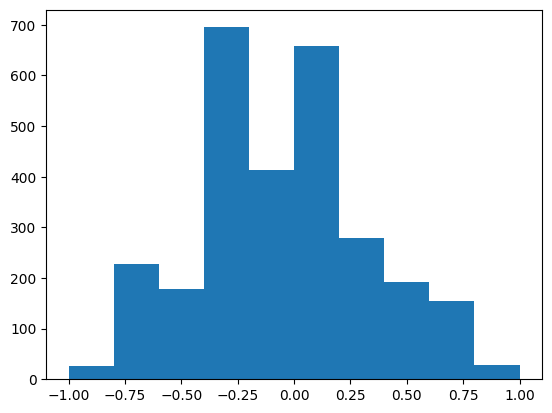

In [604]:
import matplotlib.pyplot as plt

kendalltau_counter = en_race_hf_rank_comb_valid['kendall_tau'].value_counts()
print(kendalltau_counter)
plt.figure()
plt.hist(en_race_hf_rank_comb_valid['kendall_tau'].values)

Chinese-Race-hf_tf

In [605]:
zh_race_hftf_tb, zh_race_hftf_rank_comb = results_analysis('race', 'zh', 'hf_tf', 1, {})

/tmp/ipykernel_2078198/2962395531.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

Chinese-Race-hf

In [606]:
zh_race_hf_tb, zh_race_hf_rank_comb = results_analysis('race', 'zh', 'hf', 1, {})

/tmp/ipykernel_2078198/2962395531.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

Hispanic-Race-hftf

In [607]:
es_race_hftf_tb, es_race_hftf_rank_comb = results_analysis('race', 'es', 'hf_tf', 1, {})

/tmp/ipykernel_2078198/2962395531.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

Hispanic-Race-hf

In [608]:
es_race_hf_tb, es_race_hf_rank_comb = results_analysis('race', 'es', 'hf', 1, {})

/tmp/ipykernel_2078198/2962395531.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

French-Race-hftf

In [609]:
fr_race_hftf_tb, fr_race_hftf_rank_comb = results_analysis('race', 'fr', 'hf_tf', 1, {})

/tmp/ipykernel_2078198/2962395531.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

French-Race-hf

In [610]:
fr_race_hf_tb, fr_race_hf_rank_comb = results_analysis('race', 'fr', 'hf', 1, {})

/tmp/ipykernel_2078198/2962395531.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

Combine hftf of four languages

In [611]:
print(len(en_race_hftf_tb.columns), len(zh_race_hftf_tb.columns), len(es_race_hftf_tb.columns), len(fr_race_hftf_tb.columns))

34 34 34 34


In [612]:
print(es_race_hftf_tb['cohere'])

 als                           {'max': ('hispanic', -0.2504517119), 'min': ('...
 mi                            {'max': ('hispanic', -0.666162981), 'min': ('w...
 mnd                           {'max': ('hispanic', -0.449361108), 'min': ('w...
achilles tendinitis            {'max': ('hispanic', -0.941842591), 'min': ('w...
acne                           {'max': ('hispanic', -0.281065525), 'min': ('a...
                                                     ...                        
ulcerative colitis             {'max': ('hispanic', -0.489240469), 'min': ('w...
upper respiratory infection    {'max': ('hispanic', -0.4064842305), 'min': ('...
urinary tract infection        {'max': ('hispanic', -0.3718893537), 'min': ('...
vision problems                {'max': ('hispanic', -0.16309708750000002), 'm...
visual anomalies               {'max': ('hispanic', -0.2679079271), 'min': ('...
Name: cohere, Length: 92, dtype: object


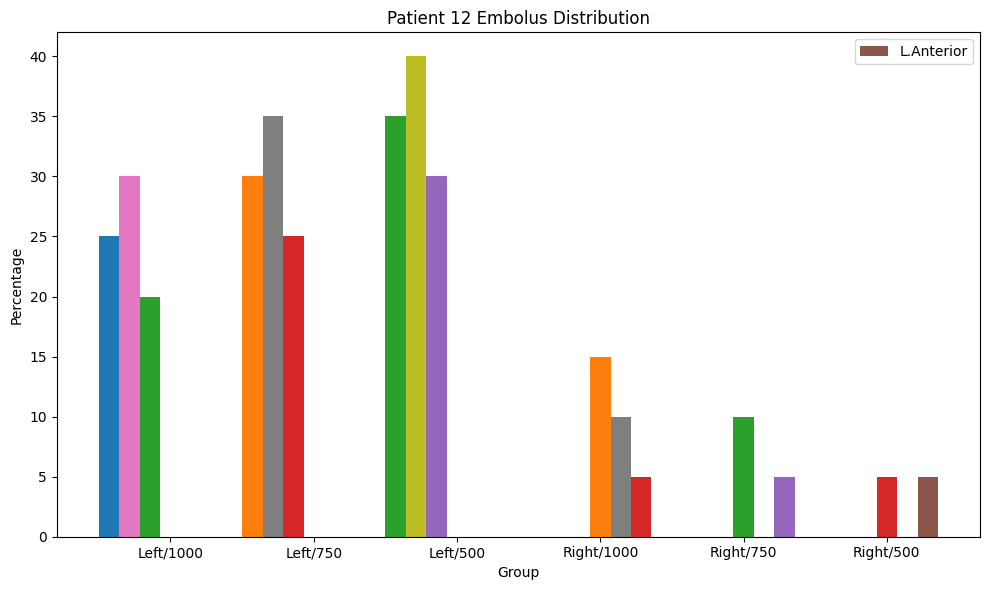

In [332]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data for demonstration purposes
# Assume each sublist corresponds to a different stacked bar within the group
data = {
    'Group': ['Left/1000', 'Left/750', 'Left/500', 'Right/1000', 'Right/750', 'Right/500'],
    'L.Anterior': [25, 30, 35, 0, 0, 0],
    'L.MCA': [30, 35, 40, 0, 0, 0],
    'L.Posterior': [20, 25, 30, 0, 0, 0],
    'R.Anterior': [0, 0, 0, 15, 10, 5],
    'R.MCA': [0, 0, 0, 10, 0, 0],
    'R.Posterior': [0, 0, 0, 5, 5, 5]
}

df = pd.DataFrame(data)
df.set_index('Group', inplace=True)

# Number of unique groups (Left/1000, Left/750, etc.)
num_unique_groups = len(df.index.unique())

# The width of each individual stacked bar
bar_width = 0.1

# The spacing between each group of stacks
group_width = bar_width * (len(df.columns) + 1)

# Positions of the groups on the x-axis
group_indices = np.arange(0, num_unique_groups * group_width, group_width)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each subgroup (L.Anterior, L.MCA, etc.)
for i, column in enumerate(df.columns):
    subgroup_bottoms = np.zeros(num_unique_groups)
    # Plot each stack within the subgroup
    for j in range(len(df[column])):
        # Determine the position of the bar based on its group and stack order
        position = group_indices[j] + (i * bar_width)
        ax.bar(position, df[column].iloc[j], bar_width, bottom=subgroup_bottoms[j], label=column if i == 0 else "")
        subgroup_bottoms[j] += df[column].iloc[j]

# Set the position and labels of the X ticks
ax.set_xticks(group_indices + (group_width / 2) - (bar_width / 2))
ax.set_xticklabels(df.index.unique())

# Adding labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Percentage')
ax.set_title('Patient 12 Embolus Distribution')

# Adding legend
# This bit of code ensures that the legend is not repeated
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Show the plot
plt.tight_layout()
plt.show()

Get bar chart for top demographic distribution across all diseases (for race, hftf)

In [613]:
languages = ['en', 'zh', 'es', 'fr']

In [582]:
def generate_df_language(hftf_tb, demographic='race', top_bot_mode='top'):
    # Calculate top and bottom race count across all models for en
    model_dist_dict = {}
    if demographic == 'race':
        categories = race_categories
    else:
        categories = gender_categories
    for column in hftf_tb.columns:
        if top_bot_mode == 'top':
            temp_dict = dict(Counter(hftf_tb[column].apply(lambda x: x['max'][0])))
        else:
            temp_dict = dict(Counter(hftf_tb[column].apply(lambda x: x['min'][0])))
        for demo in categories:
            if demo not in temp_dict:
                temp_dict[demo] = 0
        temp_dict = dict(sorted(temp_dict.items()))
        # print(temp_dict)
        model_dist_dict[column] = temp_dict

    model_dist_df = pd.DataFrame(model_dist_dict)
    return model_dist_df    

In [614]:
en_model_dist_df = generate_df_language(en_race_hftf_tb)
zh_model_dist_df = generate_df_language(zh_race_hftf_tb)  
es_model_dist_df = generate_df_language(es_race_hftf_tb)
fr_model_dist_df = generate_df_language(fr_race_hftf_tb) 

In [615]:
en_model_dist_df

,BioMistral/BioMistral-7B,EleutherAI/pile-t5-base,EleutherAI/pile-t5-large,EleutherAI/pile-t5-xl,EleutherAI/pythia-12b-deduped,EleutherAI/pythia-160m-deduped,EleutherAI/pythia-1b-deduped,EleutherAI/pythia-2.8b-deduped,EleutherAI/pythia-410m-deduped,EleutherAI/pythia-6.9b-deduped,...,meta-llama/Llama-2-70b-chat-hf,meta-llama/Llama-2-70b-hf,mistralai/Mistral-7B-Instruct-v0.1,mistralai/Mistral-7B-v0.1,state-spaces/mamba-1.4b,state-spaces/mamba-130m,state-spaces/mamba-2.8b,state-spaces/mamba-2.8b-slimpj,state-spaces/mamba-370m,state-spaces/mamba-790m
asian,14,2,1,6,0,17,28,22,7,2,...,0,10,1,2,37,36,19,37,5,37
black,3,53,1,79,5,12,5,7,6,43,...,6,4,0,6,0,0,30,20,12,0
hispanic,47,0,1,0,30,20,23,20,7,2,...,43,42,0,0,2,0,0,0,9,0
indigenous,9,0,0,0,35,15,1,16,32,42,...,18,4,1,0,48,55,22,14,34,0
pacific islander,2,0,82,5,10,10,34,27,30,1,...,1,1,90,80,5,1,9,0,17,55
white,17,37,7,2,12,18,1,0,10,2,...,24,31,0,4,0,0,12,21,15,0


In [616]:
print([i for i in en_model_dist_df.columns if '7B' in i or '7b' in i])

['BioMistral/BioMistral-7B', 'HuggingFaceH4/mistral-7b-sft-beta', 'HuggingFaceH4/zephyr-7b-beta', 'Qwen/Qwen1.5-7B', 'Qwen/Qwen1.5-7B-Chat', 'allenai/tulu-2-7b', 'allenai/tulu-2-dpo-7b', 'mistralai/Mistral-7B-Instruct-v0.1', 'mistralai/Mistral-7B-v0.1']


In [505]:
mamba = ['state-spaces/mamba-130m','state-spaces/mamba-370m', 'state-spaces/mamba-790m','state-spaces/mamba-1.4b','state-spaces/mamba-2.8b-slimpj','state-spaces/mamba-2.8b']
pythia = ['EleutherAI/pythia-70m-deduped', 'EleutherAI/pythia-160m-deduped', 'EleutherAI/pythia-410m-deduped','EleutherAI/pythia-1b-deduped', 'EleutherAI/pythia-2.8b-deduped','EleutherAI/pythia-6.9b-deduped','EleutherAI/pythia-12b-deduped']
over_70b = ['meta-llama/Llama-2-70b-hf','meta-llama/Llama-2-70b-chat-hf', 'epfl-llm/meditron-70b','allenai/tulu-2-70b', 'allenai/tulu-2-dpo-70b', 'Qwen/Qwen1.5-72B','Qwen/Qwen1.5-72B-Chat', 'gpt-35-turbo-0613', 'cohere']
model_7b = ['Qwen/Qwen1.5-7B','Qwen/Qwen1.5-7B-Chat', 'allenai/tulu-2-7b','allenai/tulu-2-dpo-7b', 'mistralai/Mistral-7B-v0.1','mistralai/Mistral-7B-Instruct-v0.1','BioMistral/BioMistral-7B','HuggingFaceH4/zephyr-7b-beta','HuggingFaceH4/mistral-7b-sft-beta']

Mamba Plot

In [617]:
def plot_models(model_type, models, model_dist_dict, top_bot_mode='top', demographic='race', rotation=0):
    fig, ax = plt.subplots(constrained_layout=True)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    x_pos = np.array(list(range(0, 2*len(model_dist_dict['en'][models].columns), 2))).astype(np.float32)
    print(x_pos)  

    labels = list(model_dist_dict['en'].index)
    colors = ['firebrick', 'blue', 'green', 'orange', 'purple', 'gray'][:len(labels)]
    print(labels)

    for language in ['en', 'zh', 'es', 'fr']:
        rows = 0
        model_dist_df = model_dist_dict[language][models]
        for i in model_dist_df.iterrows():
            print(i[1].values)
            ax.bar(x_pos, i[1].values, bottom=model_dist_df.iloc[:rows].sum(axis=0), color=colors[rows], width=0.3)
            rows += 1
        x_pos += 0.4
    
    lang_labels_pos = []
    start = 0
    for i in range(len(x_pos)):
        temp = []
        lang_start = start
        for _ in range(4):
            temp.append(lang_start)
            lang_start += 0.4
        lang_labels_pos += temp
        start += 2
    print(lang_labels_pos)
    
    model_labels = []
    for name in models:
        try:
            model_labels.append(name.split('/')[1])
        except:
            model_labels.append(name)
            
    ax.set_xlabel('model name')
    ax.xaxis.set_label_coords(0.5,-0.15)
    ax.set_ylabel('demographic count across disesases')
    sec_x = ax.secondary_xaxis('top')
    sec_x.set_xticks(lang_labels_pos, ['en', 'zh', 'es', 'fr']*len(models))
    ax.set_xticks(np.array(range(0, 2*len(en_model_dist_df[models].columns), 2))+0.6, model_labels, rotation=rotation)
    # ax.set_xticks(lang_labels_pos, ['en', 'zh', 'es', 'fr']*len(models), minor=True)
    ax.set_title(f'{demographic} distribution of {top_bot_mode} demographic for each {model_type} model across diseases in English (America)')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), labels=labels, labelcolor=colors, ncols=6)
    plt.show()

In [618]:
top_language_dict = {'en': en_model_dist_df, 'zh': zh_model_dist_df, 'es': es_model_dist_df, 'fr': fr_model_dist_df}

[ 0.  2.  4.  6.  8. 10.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[36  5 37 37 37 19]
[ 0 12  0  0 20 30]
[0 9 0 2 0 0]
[55 34  0 48 14 22]
[ 1 17 55  5  0  9]
[ 0 15  0  0 21 12]
[ 0  0  0 27  0  0]
[0 1 0 0 0 0]
[ 0 91  1 65  0  0]
[ 0  0 91  0 92 92]
[92  0  0  0  0  0]
[0 0 0 0 0 0]
[ 0  2 92 92 92 37]
[34  0  0  0  0  0]
[3 0 0 0 0 0]
[10  0  0  0  0 40]
[45 89  0  0  0  0]
[ 0  1  0  0  0 15]
[ 8 56 17 92 92  0]
[ 5  0  0  0  0 25]
[18  0  0  0  0  0]
[10 35  0  0  0 11]
[39  0 75  0  0 56]
[12  1  0  0  0  0]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001]


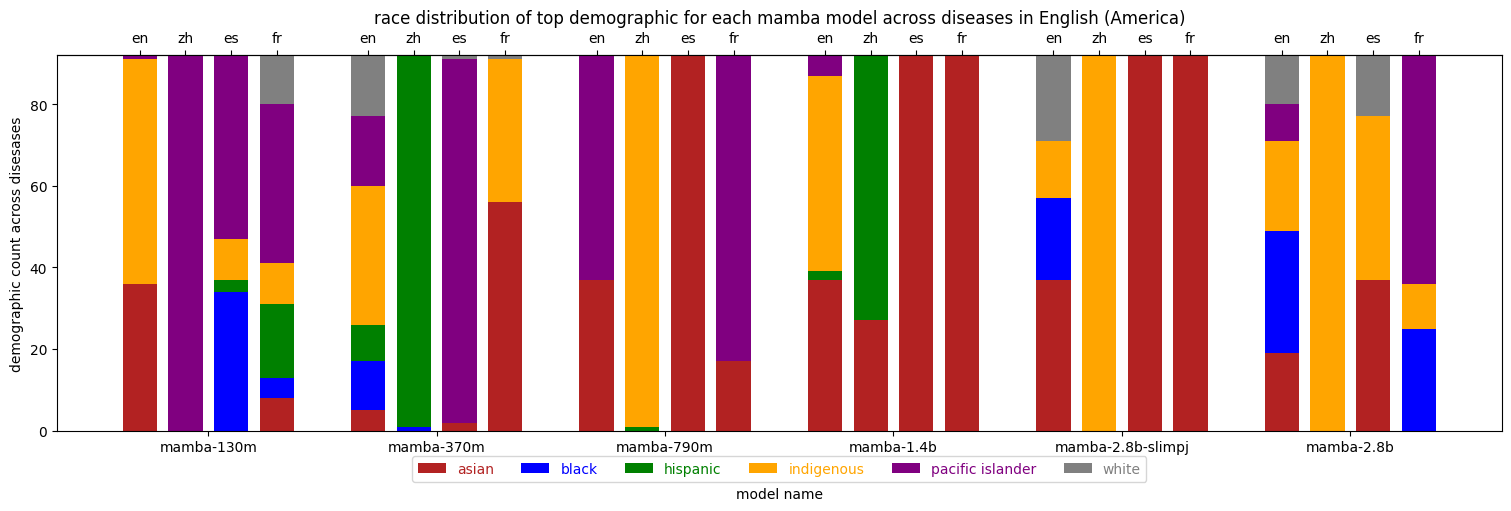

In [619]:
plot_models('mamba', mamba, top_language_dict)

Pythia Plot

[ 0.  2.  4.  6.  8. 10. 12.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[ 8 17  7 28 22  2  0]
[21 12  6  5  7 43  5]
[22 20  7 23 20  2 30]
[18 15 32  1 16 42 35]
[ 4 10 30 34 27  1 10]
[19 18 10  1  0  2 12]
[22 10 58  3 43 14  2]
[ 6 35  0  1  3 24  0]
[34 25  0 44 29  1 71]
[ 9  0 18  7 15 37 18]
[12  0  2 33  0 16  0]
[ 9 22 14  4  2  0  1]
[12  3 67 57 66 12 16]
[33 16  2  0  4 14 34]
[12  4 13  2  1  1  2]
[ 8 53  8  1 14 44 20]
[17  7  1 29  1  5  6]
[10  9  1  3  6 16 14]
[ 9 10  4 19 19 13  9]
[20  7  2  3  4 47 28]
[18 13 21 20  7 10  1]
[ 1 29 16  5  3  1 26]
[35 26 39 44 53  2 22]
[ 9  7 10  1  6 19  6]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001]


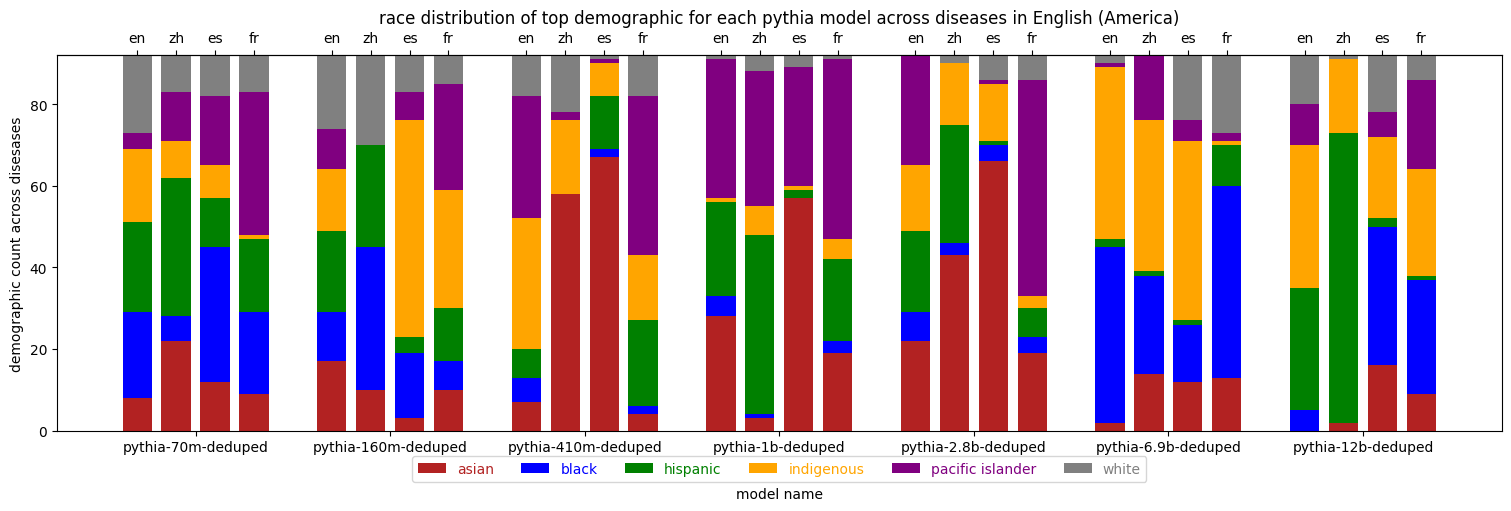

In [620]:
plot_models('pythia', pythia, top_language_dict, rotation=0)

Over-70B plot

[ 0.  2.  4.  6.  8. 10. 12. 14. 16.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[10  0 14  0 22  1  1 10  0]
[ 4  6 13  0  7 33 52 28  8]
[42 43  9  1  5  7  0  9 14]
[ 4 18  0  0  0  6  9 23 38]
[ 1  1 32 91 51  3  5  7  1]
[31 24 24  0  7 42 25 15 31]
[46  0 16  3 19  4  1  6  0]
[ 6  1 14 36  3 20 59 29 50]
[ 4  0 16  1  6 51  2  1 42]
[ 6  1  2  4  7  1 11 37  0]
[16  0 14  0 11  4 12  4  0]
[14 90 30 48 46 12  7 15  0]
[ 0  0  7  9 33  0  0  4  0]
[ 0 22 23 44 19  1 12 47  0]
[ 1 11 12 11  3 47 22  7 92]
[ 0 30 18 12  8  0  5 19  0]
[ 0 23 12  1  7 41 47  0  0]
[91  6 20 15 22  3  6 15  0]
[ 0  0  4  0 55  1  0 23  0]
[ 0  1  4 17  5 10 38 16  0]
[ 0  0 21 15  2 13  2  9 92]
[ 0  3  3 16  1  1  9 29  0]
[ 4 86 16  2 11 55 35  3  0]
[88  2 44 42 18 12  8 12  0]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 1

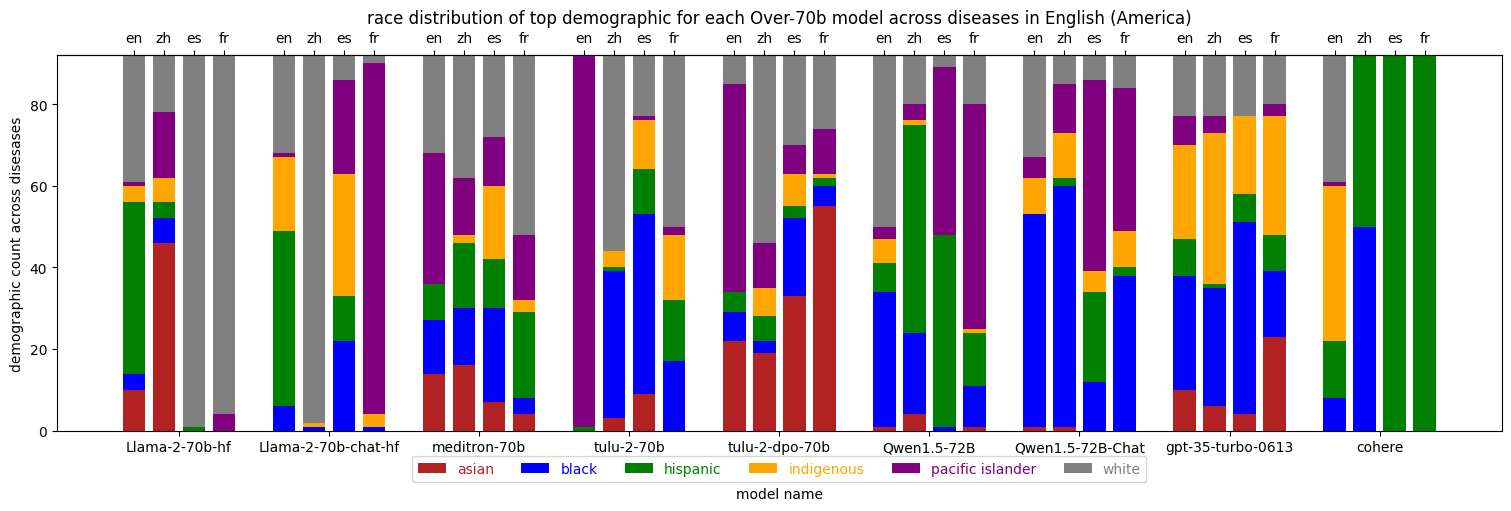

In [621]:
plot_models('Over-70b', over_70b, top_language_dict)

7b plot

[ 0.  2.  4.  6.  8. 10. 12. 14. 16.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[ 1  6  0  0  2  1 14  2  2]
[11 25  0  0  6  0  3  0  0]
[14 11  1  1  0  0 47  0  0]
[7 2 0 0 0 1 9 0 0]
[32  1 91 91 80 90  2 90 90]
[27 47  0  0  4  0 17  0  0]
[15 14 34 10  0  9  1  0 63]
[ 7 13 13 10 24 30  0 24  0]
[19 15 12 16  5 14  9  9 23]
[ 9  0 25 26 31 11 80 13  4]
[11  0  6 30  1 11  1 27  2]
[31 50  2  0 31 17  1 19  0]
[ 5  1 50 21 14  1  0  0  8]
[ 9  0  5  7 24 14  1 10 38]
[14 50 17 41  7 38 11  6 10]
[11  7  1 14 42  6 44 17 20]
[18 11 17  7  0 25 36 56  2]
[35 23  2  2  5  8  0  3 14]
[ 2  0 27  3 29  5  9  0 15]
[10  1  3  1 19 16  1  1 25]
[14 56 50 12  0  9  5 10 38]
[10  6  5 34  2 17  7 12  9]
[26  0  6 40  1 27 45 57  4]
[30 29  1  2 41 18 25 12  1]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 

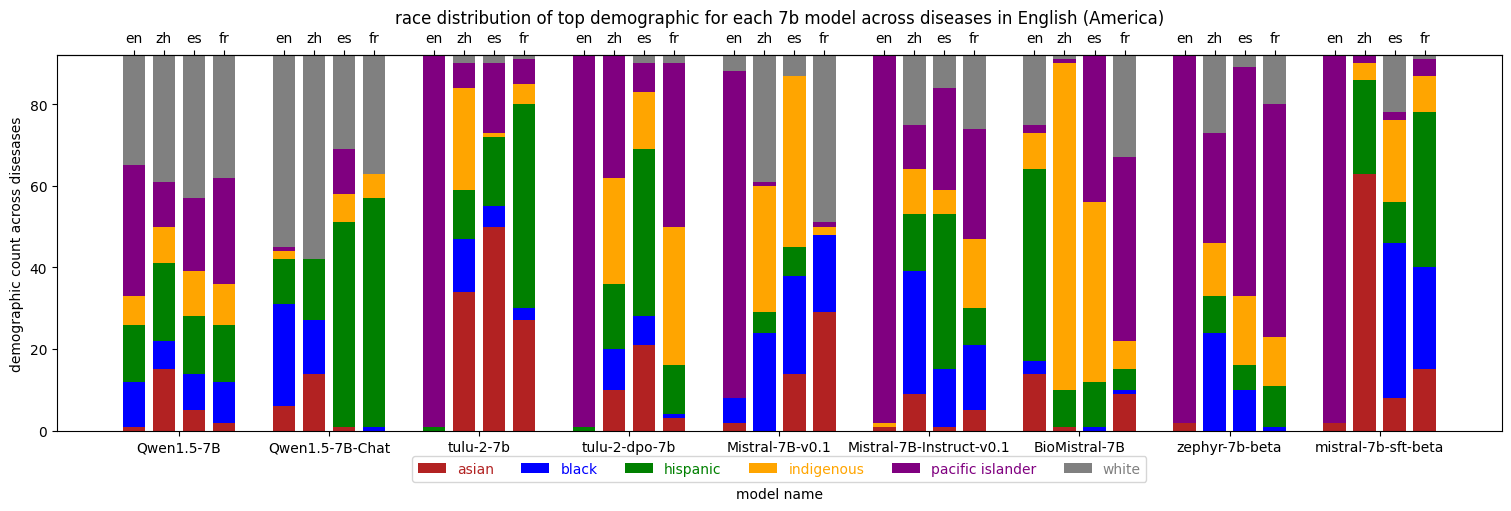

In [622]:
plot_models('7b', model_7b, top_language_dict)

Generate plots for race bottom

In [623]:
en_model_dist_bot_df = generate_df_language(en_race_hftf_tb, top_bot_mode='bot')
zh_model_dist_bot_df = generate_df_language(zh_race_hftf_tb, top_bot_mode='bot')  
es_model_dist_bot_df = generate_df_language(es_race_hftf_tb, top_bot_mode='bot')
fr_model_dist_bot_df = generate_df_language(fr_race_hftf_tb, top_bot_mode='bot') 

In [624]:
bot_language_dict = {'en': en_model_dist_bot_df, 'zh': zh_model_dist_bot_df, 'es': es_model_dist_bot_df, 'fr': fr_model_dist_bot_df}

[ 0.  2.  4.  6.  8. 10.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[55 55 55 55 55 56]
[26  4 28  0  0  0]
[ 0 13  0  0 29 25]
[9 8 9 8 8 8]
[ 0 12  0  0  0  1]
[ 2  0  0 29  0  2]
[ 0 13  0  0 10  0]
[ 0  2 70  0 82 31]
[1 0 0 0 0 0]
[ 0 21  0  0  0  0]
[ 0  0  2 87  0  0]
[91 56 20  5  0 61]
[0 0 0 0 0 0]
[ 0 19 92  0  0  0]
[ 1 72  0 86 90 72]
[7 1 0 0 2 0]
[ 0  0  0  0  0 20]
[84  0  0  6  0  0]
[40  0  0  0  0 19]
[19  0 77  0  0  0]
[ 8 92  2 57 92 65]
[12  0  0  0  0  0]
[ 3  0  0 29  0  0]
[10  0 13  6  0  8]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001]


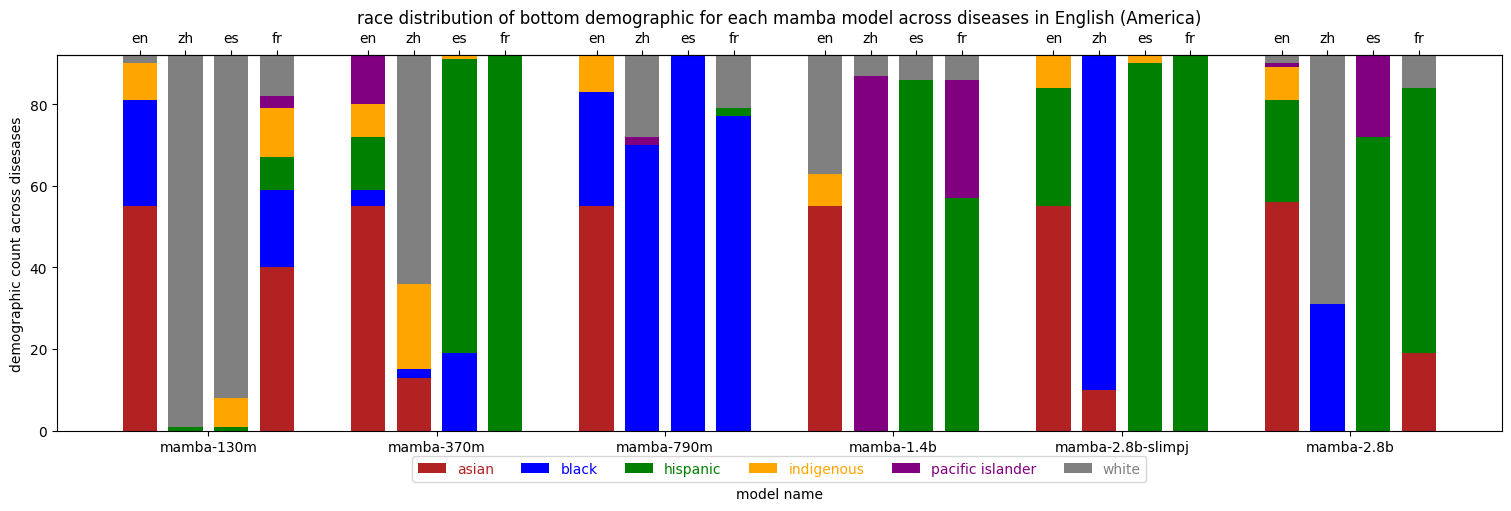

In [625]:
plot_models('mamba', mamba, bot_language_dict, 'bottom')

[ 0.  2.  4.  6.  8. 10. 12.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[43 55 55 56 55 55 55]
[10  7 16  6  6  0  2]
[ 3 13  4  6  2 13  2]
[13  8  8  8  8  9  8]
[17  6  1  0  2 15 21]
[ 6  3  8 16 19  0  4]
[ 6  2  0 23  0  7 29]
[22  1 33 21  3  0 27]
[ 4  0 44  0  0 32  0]
[18 21  3 17  0  0  6]
[16 67 10  0 76  0 26]
[26  1  2 31 13 53  4]
[20 14  0  0  1  5  6]
[ 8 16 25 60 19 11  0]
[13 27  5  3 20 37 33]
[27  2  2 10  5  3  3]
[16 17 38  1 41 28 46]
[ 8 16 22 18  6  8  4]
[15  8 31  7  7  6  6]
[13 24 23  6 24  2  4]
[11 17  3  2 13  8 44]
[30  7  7 16 24 17  0]
[ 2 17  4  6  5 56 12]
[21 19 24 55 19  3 26]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001]


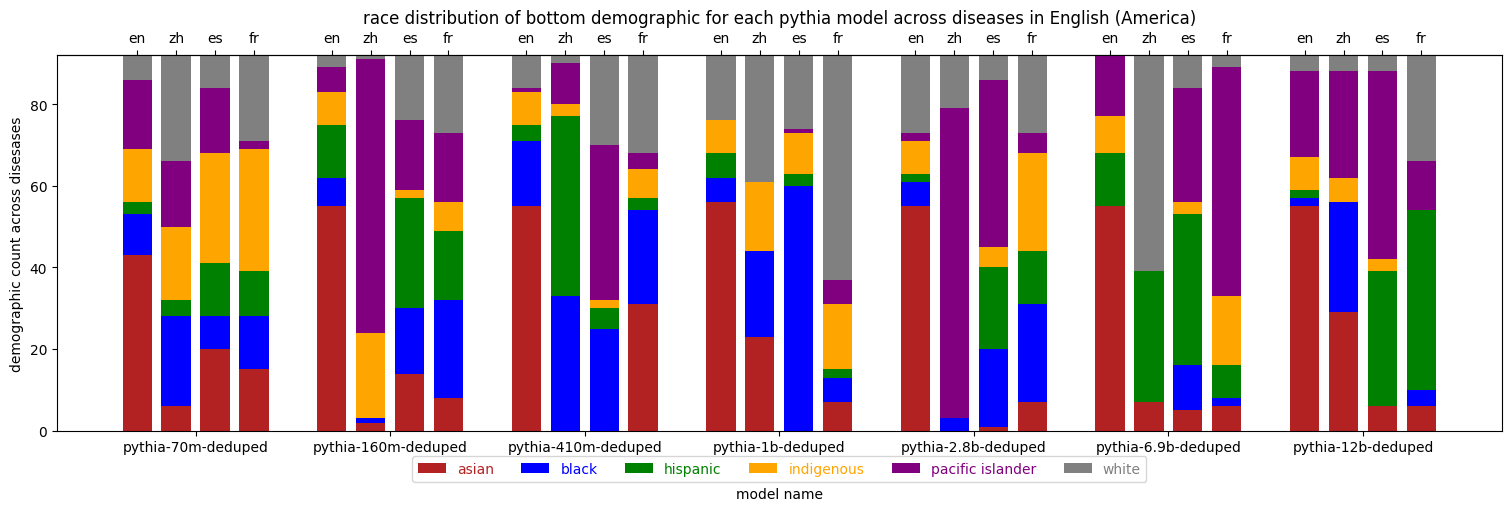

In [626]:
plot_models('pythia', pythia, bot_language_dict, 'bottom')

[ 0.  2.  4.  6.  8. 10. 12. 14. 16.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[ 0  1 17  4  0 54 49 24 77]
[ 0  0  4  2 15  2  0 23  4]
[ 1  0 15  2  2  2 18 16  0]
[ 0  0 34 71 68 18 10  3  0]
[91 91 16  1  3 12  6 18  9]
[ 0  0  6 12  4  4  9  8  2]
[ 3  1  1 13  3 21 49 35 87]
[ 6  0  9  1 16  2  0  0  0]
[32  2 13  9 30  0  4 15  0]
[10  0 38  5  7 14  3  0  5]
[29 89 30 64 33 32  2 27  0]
[12  0  1  0  3 23 34 15  0]
[ 1 91 19 24  1 41 66 44 19]
[ 2  0  6  3  5 30  1  6  7]
[13  1 12  6 20  0  0  9  0]
[26  0  9  9 11  2  4  6  1]
[50  0 41 44 51 10 12 27  0]
[ 0  0  5  6  4  9  9  0 65]
[47 36 17 20  1 40 45 24  0]
[ 0  0 19  2 26 13  6 20  3]
[13 56  3  1  3  3  5 30  0]
[32  0  2  2 36  7  0  1 10]
[ 0  0 48 67 17  4 28 14 78]
[ 0  0  3  0  9 25  8  3  1]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 1

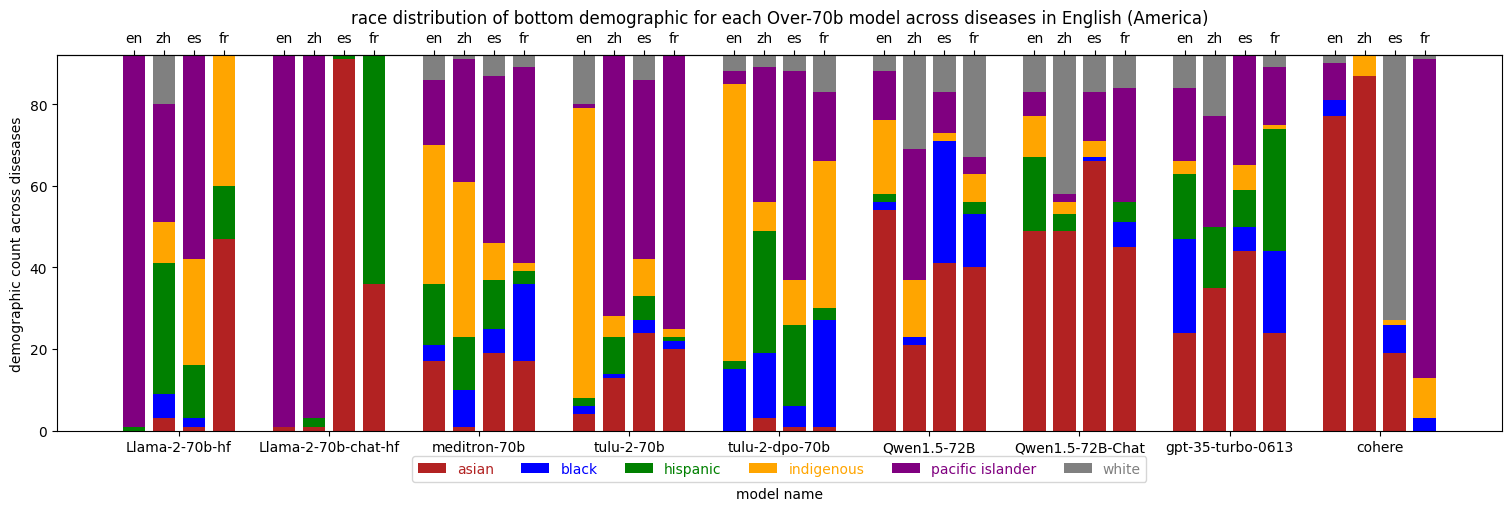

In [627]:
plot_models('Over-70b', over_70b, bot_language_dict, 'bottom')

[ 0.  2.  4.  6.  8. 10. 12. 14. 16.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[40 54  2  5  0 41  0  2  0]
[12  0 12 19  1  4  1  4  6]
[ 7  1  2  3 86 25  0  5  0]
[28 23 53 48  3 14  1 23  8]
[ 2 14  1  1  2  2 90  2  2]
[ 3  0 22 16  0  6  0 56 76]
[21  8  1  7 30 13  3 85  0]
[16  3  2  4  0  3 87  0 28]
[ 4  0 29 11 24 28  0  2  1]
[22 32  1  5  0 23  0  0  5]
[19 48 19  1 37 15  1  0 19]
[10  1 40 64  1 10  1  5 39]
[ 9 32  2  2  2 34 31 39  5]
[14 25 19 13  1  3 29  8  3]
[ 8  0  6  2  6  1  4 17 12]
[39 14 28  6  1  3  1  1  8]
[20 21  8 23 72 31  1  0 60]
[ 2  0 29 46 10 20 26 27  4]
[22 42  1 13  1 15  8 19 11]
[ 8 18 37 46  0  9 63 47  3]
[17  0  0  3 69  8 11  9  3]
[15  2 12  2  4  5  3  2 14]
[23 30 14  1 18 46  5  1 42]
[ 7  0 28 27  0  9  2 14 19]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 1

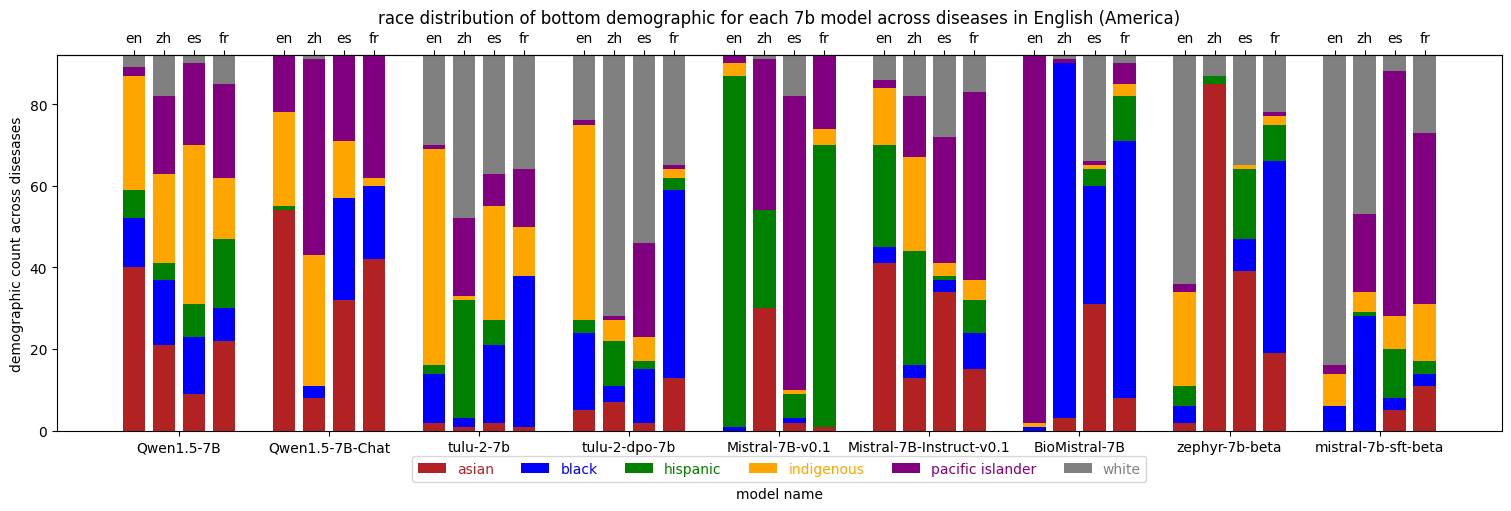

In [628]:
plot_models('7b', model_7b, bot_language_dict, 'bottom')

Section 3.2 Gender Language Eval

In [559]:
en_gender_hftf_tb, en_gender_hftf_rank_comb = results_analysis('gender', 'en', 'hf_tf', 1, {})
en_gender_hftf_rank_comb_filter = en_gender_hftf_rank_comb[(en_gender_hftf_rank_comb['model_name'] != 'azure') & (en_gender_hftf_rank_comb['model_name'] != 'cohere')]
en_gender_hf_tb, en_gender_hf_rank_comb = results_analysis('gender', 'en', 'hf', 1, en_gender_hftf_rank_comb_filter)

/tmp/ipykernel_2078198/2962395531.py:31: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/tmp/ipykernel_2078198/2962395531.py:31: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [560]:
en_gender_hf_rank_comb_valid = en_gender_hf_rank_comb[en_gender_hf_rank_comb['kendall_tau'] != -float('inf')]
print(en_gender_hf_rank_comb_valid['kendall_tau'].value_counts())
en_gender_hf_rank_comb_valid

kendall_tau
 1.000000    948
 0.333333    938
-0.333333    525
-1.000000    348
Name: count, dtype: int64


,disease,model_name,demographic_rank,logits_ranking,kendall_tau,refer_demographic_rank,refer_logits_ranking
0,als,BioMistral/BioMistral-7B,"['female', 'male', 'non-binary']",[-191.06774902 -191.52168732 -220.210672 ],-0.333333,"[non-binary, female, male]",[-21.40905914 -21.83552237 -22.49340734]
0,mi,BioMistral/BioMistral-7B,"['female', 'male', 'non-binary']",[-190.43320313 -191.46625366 -220.24535217],-0.333333,"[non-binary, female, male]",[-21.77155275 -22.2640625 -22.73477592]
0,mnd,BioMistral/BioMistral-7B,"['female', 'male', 'non-binary']",[-198.46759186 -198.97899475 -227.45409241],-0.333333,"[non-binary, female, male]",[-21.34001579 -21.48031187 -21.91158953]
0,achilles tendinitis,BioMistral/BioMistral-7B,"['male', 'female', 'non-binary']",[-258.43979797 -258.52862701 -286.93186646],-0.333333,"[non-binary, male, female]",[-22.78384981 -23.05288763 -23.08606834]
0,acne,BioMistral/BioMistral-7B,"['female', 'male', 'non-binary']",[-208.24888763 -210.13381348 -240.04719543],-0.333333,"[non-binary, female, male]",[-22.13736639 -22.8679368 -23.13211374]
...,...,...,...,...,...,...,...
0,type two diabetic,state-spaces/mamba-790m,"['female', 'male', 'non-binary']",[-170.55 -172.175 -196.8625],-0.333333,"[non-binary, female, male]",[-6.80761719 -6.82265625 -6.83945313]
0,ulcerative colitis,state-spaces/mamba-790m,"['female', 'male', 'non-binary']",[-183.7875 -185.35 -212.4875],1.000000,"[female, male, non-binary]",[-9.16523438 -9.16679687 -9.24882812]
0,upper respiratory infection,state-spaces/mamba-790m,"['female', 'male', 'non-binary']",[-166.825 -168.375 -195.0375],0.333333,"[female, non-binary, male]",[-6.83320312 -6.83574219 -6.84082031]
0,urinary tract infection,state-spaces/mamba-790m,"['female', 'male', 'non-binary']",[-166.925 -168.8625 -195.2375],0.333333,"[male, female, non-binary]",[-9.12871094 -9.13476562 -9.2125 ]


kendall_tau
 1.000000    948
 0.333333    938
-0.333333    525
-1.000000    348
Name: count, dtype: int64


(array([348.,   0.,   0., 525.,   0.,   0., 938.,   0.,   0., 948.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

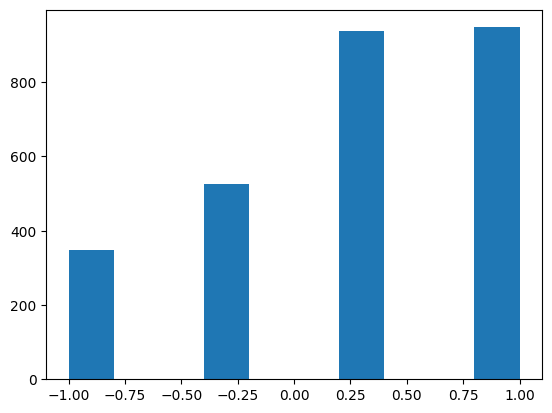

In [561]:
import matplotlib.pyplot as plt

kendalltau_counter = en_gender_hf_rank_comb_valid['kendall_tau'].value_counts()
print(kendalltau_counter)
plt.figure()
plt.hist(en_gender_hf_rank_comb_valid['kendall_tau'].values)

In [562]:
zh_gender_hftf_tb, zh_gender_hftf_rank_comb = results_analysis('gender', 'zh', 'hf_tf', 1, {})
es_gender_hftf_tb, es_gender_hftf_rank_comb = results_analysis('gender', 'es', 'hf_tf', 1, {})
fr_gender_hftf_tb, fr_gender_hftf_rank_comb = results_analysis('gender', 'fr', 'hf_tf', 1, {})

/tmp/ipykernel_2078198/2962395531.py:31: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/tmp/ipykernel_2078198/2962395531.py:31: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/tmp/ipykernel_2078198/2962395531.py:31: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operati

In [565]:
print(len(en_gender_hftf_tb.columns), len(zh_gender_hftf_tb.columns), len(es_gender_hftf_tb.columns), len(fr_gender_hftf_tb.columns))

34 34 34 34


Top hftf America gender

In [583]:
en_gender_model_dist_df = generate_df_language(en_gender_hftf_tb, 'gender')
zh_gender_model_dist_df = generate_df_language(zh_gender_hftf_tb, 'gender')  
es_gender_model_dist_df = generate_df_language(es_gender_hftf_tb, 'gender')
fr_gender_model_dist_df = generate_df_language(fr_gender_hftf_tb, 'gender') 

In [584]:
top_gender_language_dict = {'en': en_gender_model_dist_df, 'zh': zh_gender_model_dist_df, 'es': es_gender_model_dist_df, 'fr': fr_gender_model_dist_df}

In [585]:
print(zh_gender_model_dist_df.index)

Index(['female', 'male', 'non-binary'], dtype='object')


[ 0.  2.  4.  6.  8. 10.]
['female', 'male', 'non-binary']
[64  1 21 81  3 48]
[27 37 37  9 89 44]
[ 1 54 34  2  0  0]
[39  0  0 88  0 92]
[53 92  3  1 42  0]
[ 0  0 89  3 50  0]
[ 0 84  0 67 66 16]
[92  8  3 25 13 76]
[ 0  0 89  0 13  0]
[ 0 51  0 92  0 89]
[92 41  3  0 92  3]
[ 0  0 89  0  0  0]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001]


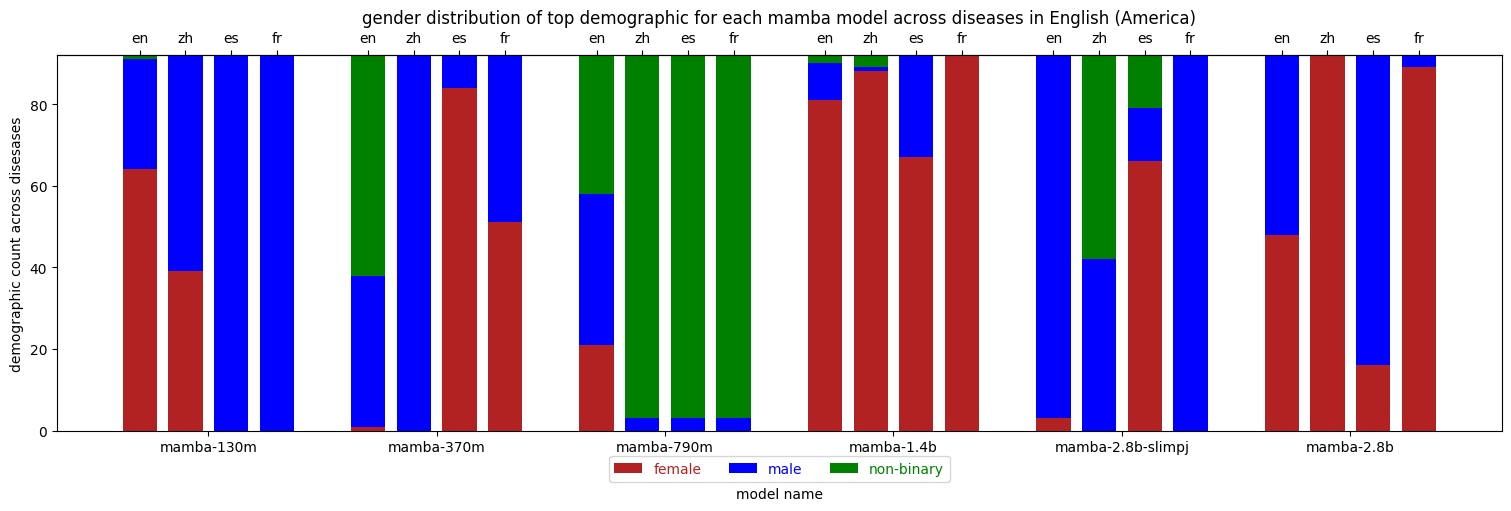

In [588]:
plot_models('mamba', mamba, top_gender_language_dict, demographic='gender')

[ 0.  2.  4.  6.  8. 10. 12.]
['female', 'male', 'non-binary']
[15 42 44 10 19 73 35]
[55 49 30 12 20  2 22]
[22  1 18 70 53 17 35]
[23 19 22 10 26 12 14]
[62 40  4 26 63 80 11]
[ 7 33 66 56  3  0 67]
[39 31 78 64 49  8 17]
[16 56 12 24 19 21 51]
[37  5  2  4 24 63 24]
[49 51 82 27 26 34 12]
[16 25  4 40 17 44 50]
[27 16  6 25 49 14 30]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001]


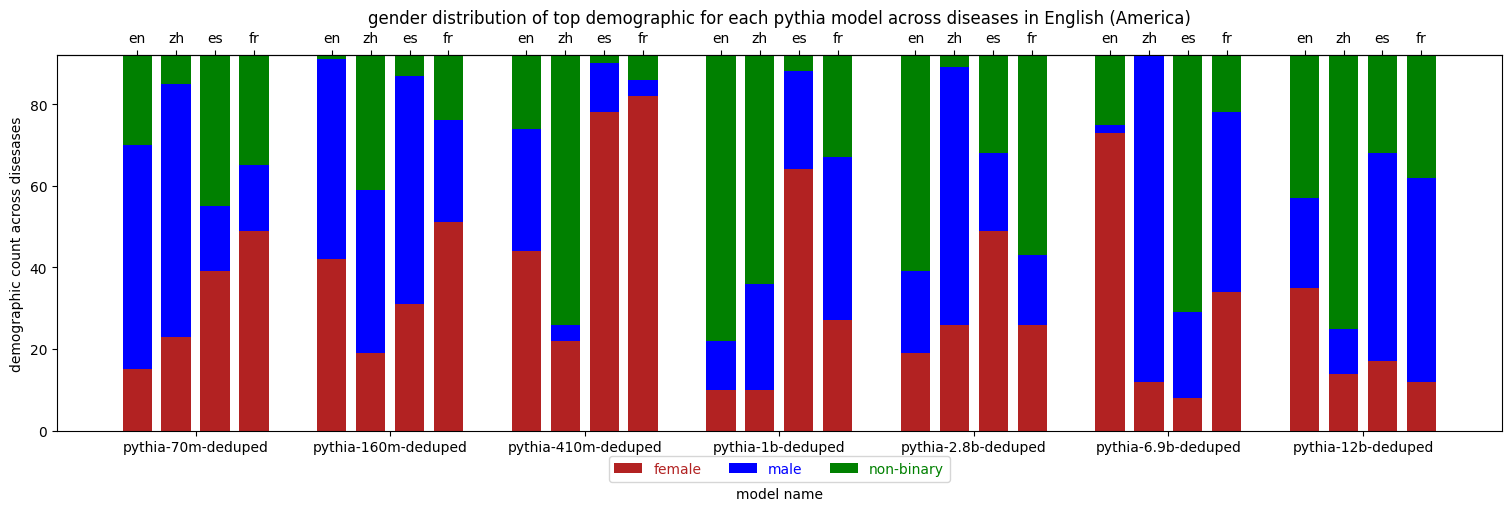

In [589]:
plot_models('pythia', pythia, top_gender_language_dict, demographic='gender')

[ 0.  2.  4.  6.  8. 10. 12. 14. 16.]
['female', 'male', 'non-binary']
[ 0  1 83 91 82 56 51 43 70]
[33 65  8  0  8 36 40 24 22]
[59 26  1  1  2  0  1 25  0]
[ 0  6 37 17  5 54 45 12  0]
[ 3 86 32 51 10 34 32  4 14]
[89  0 23 24 77  4 15 76 78]
[10 23 38 26 47 61 59 10 59]
[10 58 32 53 34 31 33  5 33]
[72 11 22 13 11  0  0 77  0]
[31  1 45 15 30 58 70  3 92]
[ 7 91  7 54 58 34 17  0  0]
[54  0 40 23  4  0  5 89  0]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001, 14, 14.4, 14.8, 15.200000000000001, 16, 16.4, 16.799999999999997, 17.199999999999996]


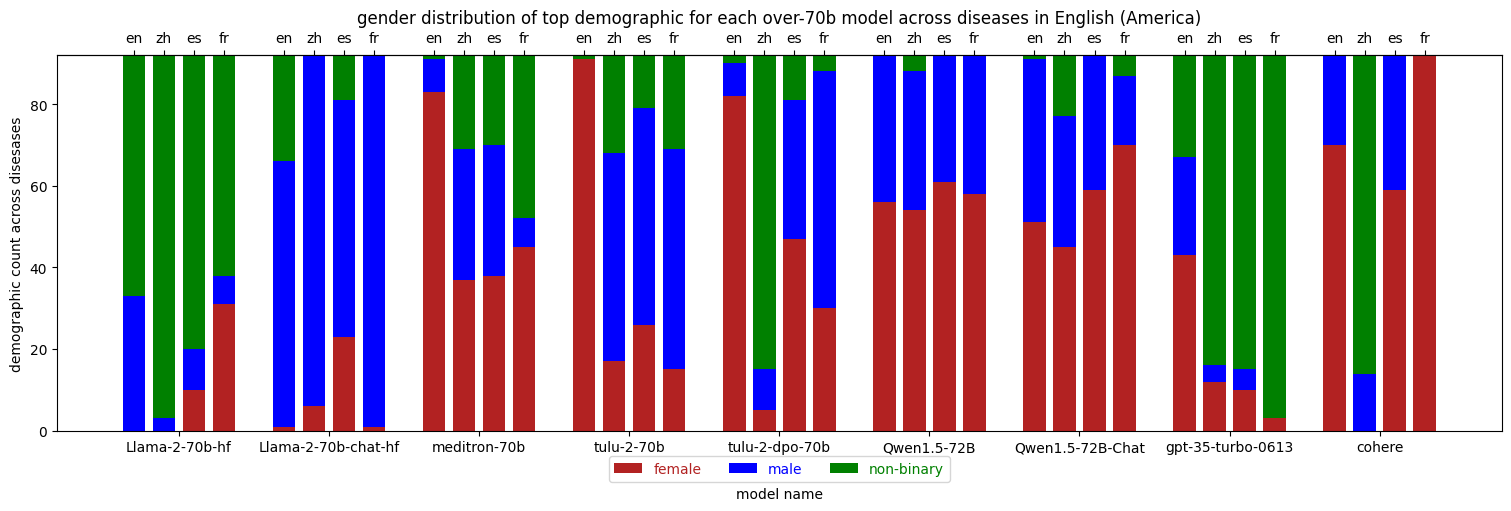

In [591]:
plot_models('over-70b', over_70b, top_gender_language_dict, demographic='gender')

[ 0.  2.  4.  6.  8. 10. 12. 14. 16.]
['female', 'male', 'non-binary']
[50 55 91 91 56 69 16 61 45]
[38 37  1  1 34 21  6 29 45]
[ 4  0  0  0  2  2 70  2  2]
[34 65 17 19 51 39 29 15 25]
[45 24 35 21 17 45 24  2  8]
[13  3 40 52 24  8 39 75 59]
[19 39 31 13 21 53 22  0 20]
[42  9 34 21 37 21 33  5  9]
[31 44 27 58 34 18 37 87 63]
[15  4 26 61 11 19 37 17 50]
[49  5 28 27 77 56 45  3 20]
[28 83 38  4  4 17 10 72 22]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001, 14, 14.4, 14.8, 15.200000000000001, 16, 16.4, 16.799999999999997, 17.199999999999996]


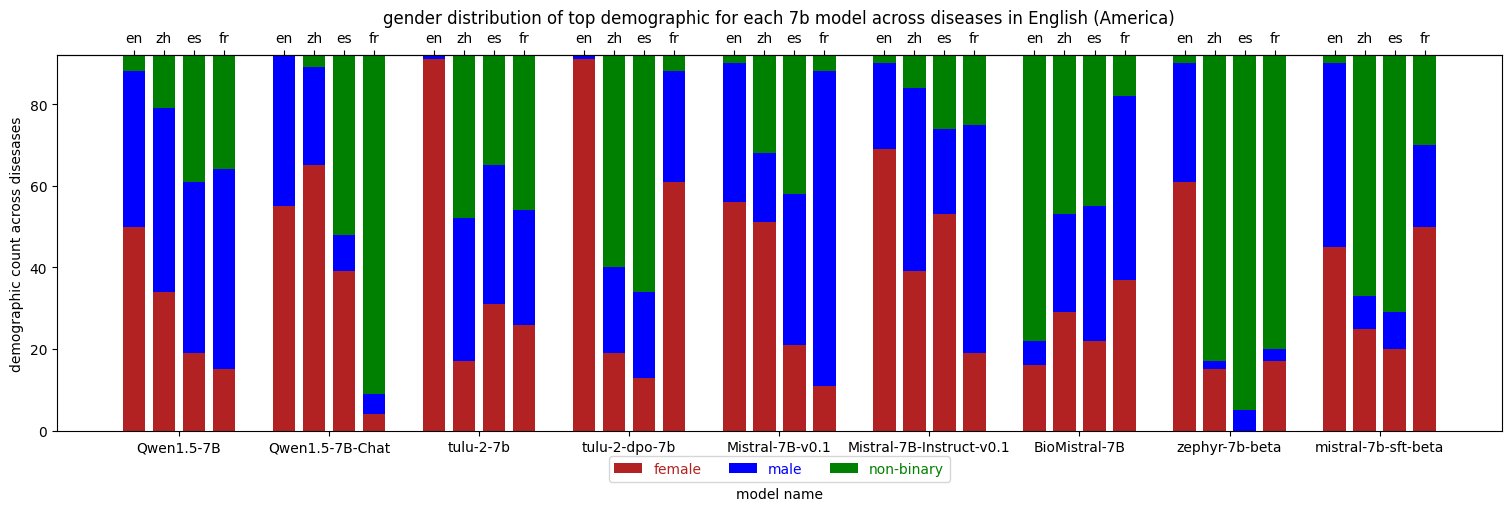

In [592]:
plot_models('7b', model_7b, top_gender_language_dict, demographic='gender')

Bottom hftf America gender

In [593]:
en_gender_model_dist_bot_df = generate_df_language(en_gender_hftf_tb, 'gender', 'bot')
zh_gender_model_dist_bot_df = generate_df_language(zh_gender_hftf_tb, 'gender', 'bot')  
es_gender_model_dist_bot_df = generate_df_language(es_gender_hftf_tb, 'gender', 'bot')
fr_gender_model_dist_bot_df = generate_df_language(fr_gender_hftf_tb, 'gender', 'bot') 

In [594]:
bot_gender_language_dict = {'en': en_gender_model_dist_bot_df, 'zh': zh_gender_model_dist_bot_df, 'es': es_gender_model_dist_bot_df, 'fr': fr_gender_model_dist_bot_df}

[ 0.  2.  4.  6.  8. 10.]
['female', 'male', 'non-binary']
[ 3 86 21  0 11  0]
[ 5  0 32 55  0  5]
[84  6 39 37 81 87]
[ 2  3 92  0 92  0]
[ 1  0  0 20  0  3]
[89 89  0 72  0 89]
[ 6  1 92  3 14  0]
[0 7 0 2 9 3]
[86 84  0 87 69 89]
[ 3  0 92  0  3  0]
[0 3 0 3 0 3]
[89 89  0 89 89 89]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001]


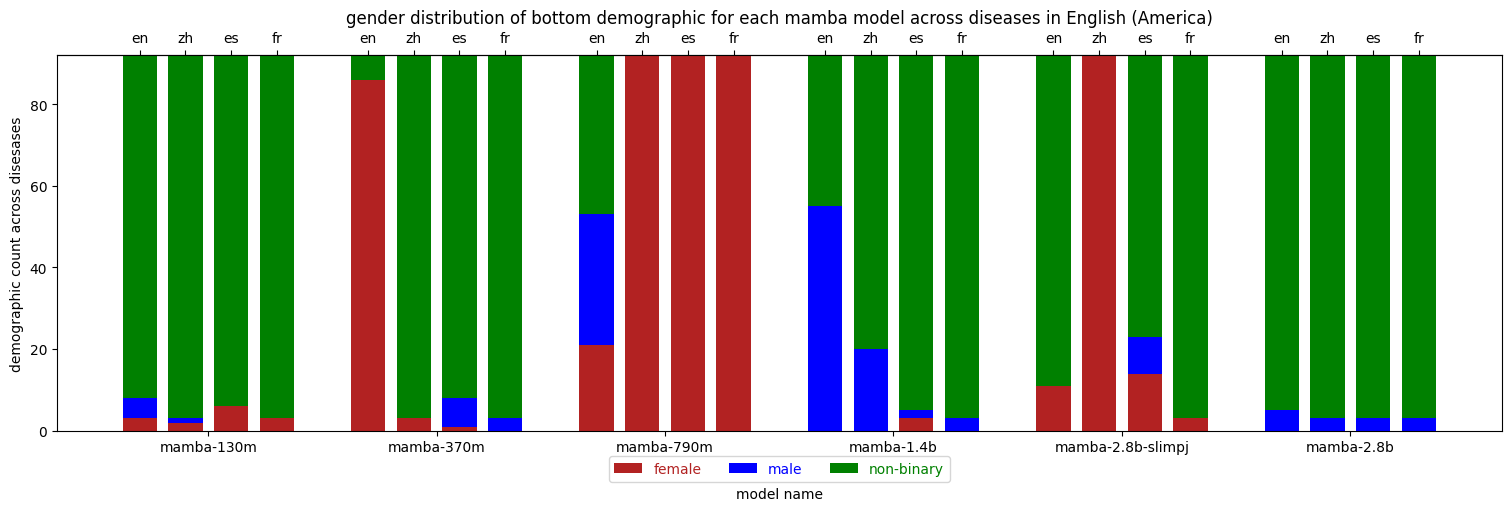

In [595]:
plot_models('mamba', mamba, bot_gender_language_dict, 'bottom', 'gender')

[ 0.  2.  4.  6.  8. 10. 12.]
['female', 'male', 'non-binary']
[56  5 17 47 40  1 26]
[11  7 27 33 39 40 27]
[25 80 48 12 13 51 39]
[21 50 14 65 15  9 42]
[ 7 14 74 21 10  0 48]
[64 28  4  6 67 83  2]
[20 22  2  4 19 54 47]
[52  4 35 26 40 37 21]
[20 66 55 62 33  1 24]
[19 18  2 19 24 30 64]
[47 29 61 32 50 29 14]
[26 45 29 41 18 33 14]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001]


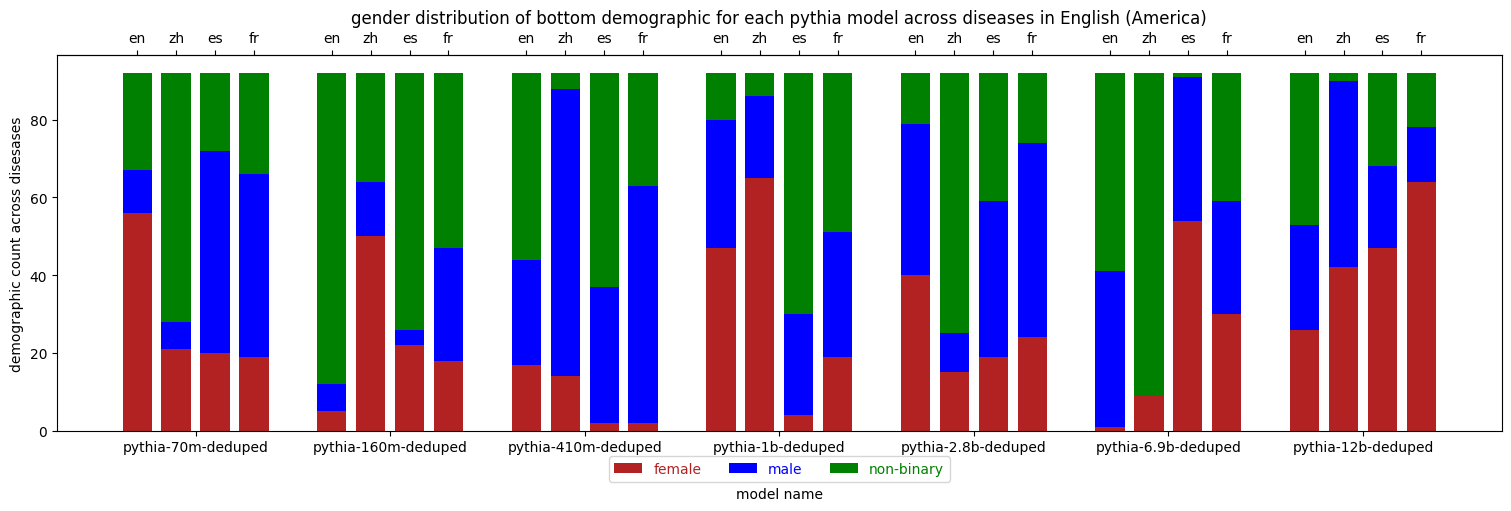

In [599]:
plot_models('pythia', pythia, bot_gender_language_dict, 'bottom', 'gender')

[ 0.  2.  4.  6.  8. 10. 12. 14. 16.]
['female', 'male', 'non-binary']
[91 91  0  1  2  4  7 29  1]
[ 0  0 22 62 48 15 26 28 25]
[ 1  1 70 29 42 73 59 35 66]
[91 21 24 33 56  9 25 26 85]
[ 1  1 28 14 28 19 38 64  6]
[ 0 70 40 45  8 64 29  2  1]
[58 38 24 36 18  1  3 38  2]
[27 10 33 17 35 15 27 54  4]
[ 7 44 35 39 39 76 62  0 86]
[23 11  6 38  5  2  4 36  0]
[59  0 48 15  6  8 65 56  4]
[10 81 38 39 81 82 23  0 88]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001, 14, 14.4, 14.8, 15.200000000000001, 16, 16.4, 16.799999999999997, 17.199999999999996]


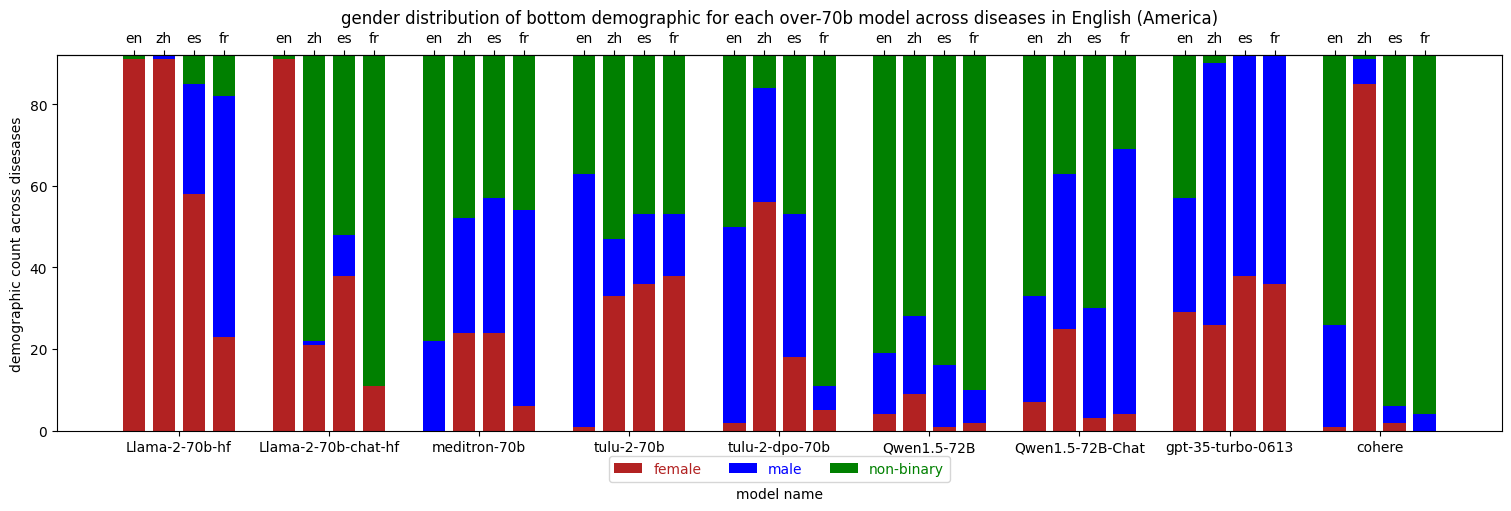

In [600]:
plot_models('over-70b', over_70b, bot_gender_language_dict, 'bottom', 'gender')

[ 0.  2.  4.  6.  8. 10. 12. 14. 16.]
['female', 'male', 'non-binary']
[13  4  1  1  3  1 20  2  2]
[13  5  9 17  2  4 69  3  3]
[66 83 82 74 87 87  3 87 87]
[16  0 42 39 12 23 33 22 22]
[22 16 27 42 45  7 34 69 64]
[54 76 23 11 35 62 25  1  6]
[43 22 33 48 37 20 36 40 32]
[24 60 25 37 31 38 33 51 57]
[25 10 34  7 24 34 23  1  3]
[38 43 44  9 36 18 24 24 10]
[29 48 27 15  3 20 15 67 47]
[25  1 21 68 53 54 53  1 35]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001, 14, 14.4, 14.8, 15.200000000000001, 16, 16.4, 16.799999999999997, 17.199999999999996]


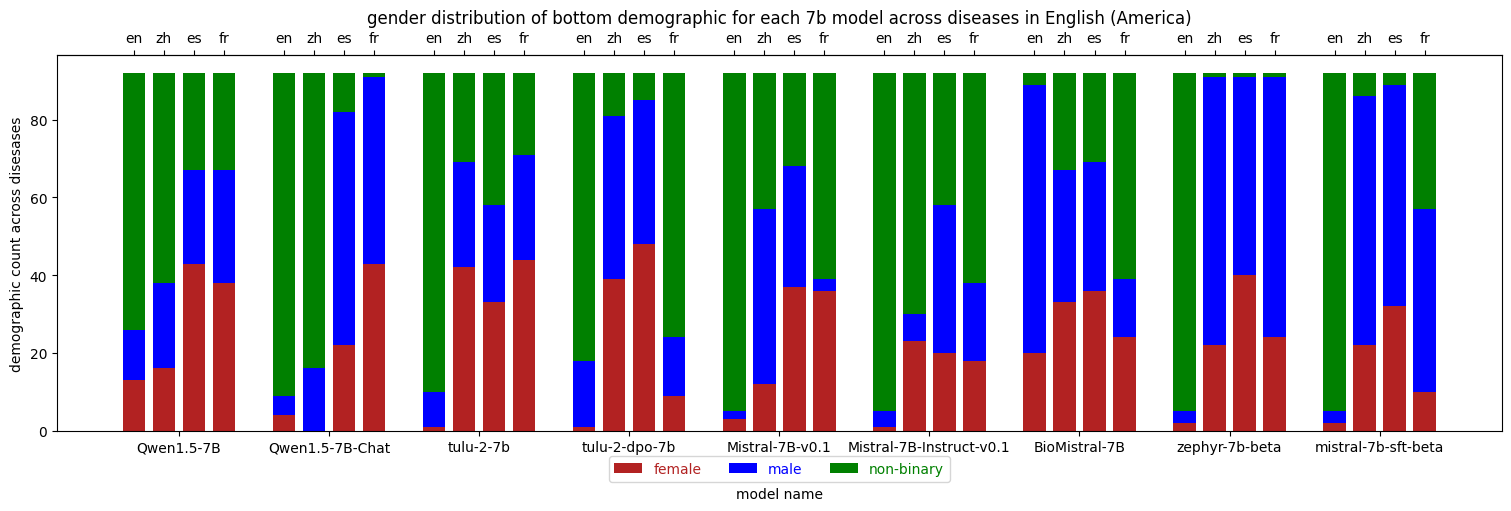

In [601]:
plot_models('7b', model_7b, bot_gender_language_dict, 'bottom', 'gender')

Race hf top

In [629]:
en_race_hf_tb, en_race_hf_rank_comb = results_analysis('race', 'en', 'hf', 1, {})
zh_race_hf_tb, zh_race_hf_rank_comb = results_analysis('race', 'zh', 'hf', 1, {})
es_race_hf_tb, es_race_hf_rank_comb = results_analysis('race', 'es', 'hf', 1, {})
fr_race_hf_tb, fr_race_hf_rank_comb = results_analysis('race', 'fr', 'hf', 1, {})

/tmp/ipykernel_2078198/2962395531.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/2962395531.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

In [630]:
print(len(en_race_hf_tb.columns), len(zh_race_hf_tb.columns), len(es_race_hf_tb.columns), len(fr_race_hf_tb.columns))

31 31 31 31


In [631]:
en_model_hf_dist_df = generate_df_language(en_race_hf_tb)
zh_model_hf_dist_df = generate_df_language(zh_race_hf_tb)  
es_model_hf_dist_df = generate_df_language(es_race_hf_tb)
fr_model_hf_dist_df = generate_df_language(fr_race_hf_tb) 

In [632]:
top_hf_language_dict = {'en': en_model_hf_dist_df, 'zh': zh_model_hf_dist_df, 'es': es_model_hf_dist_df, 'fr': fr_model_hf_dist_df}

[ 0.  2.  4.  6.  8. 10.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[ 0  0  0  0  0 55]
[ 9 46 18 78 19 34]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[83 46 74 14 73  3]
[0 0 0 0 0 0]
[92  0 92  0  0  6]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[ 0 92  0 92 92 86]
[0 0 0 0 0 0]
[ 0 92 92 92 92 92]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[92  0  0  0  0  0]
[0 0 0 0 0 0]
[92 92 92 92 92 92]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001]


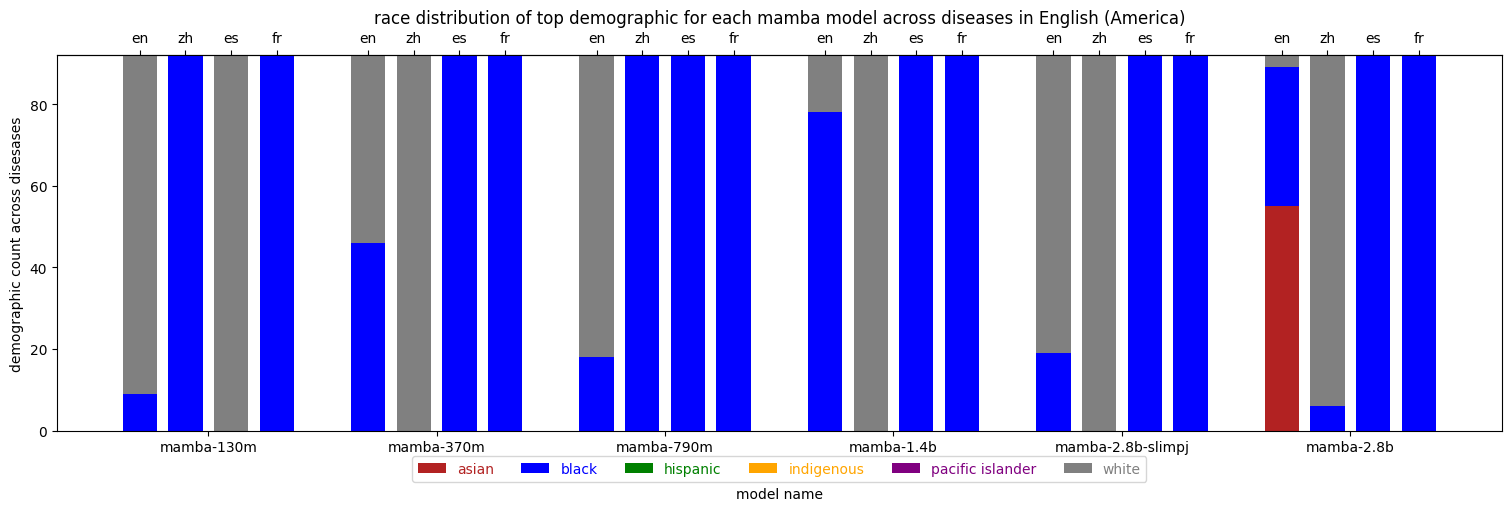

In [633]:
plot_models('mamba', mamba, top_hf_language_dict)

[ 0.  2.  4.  6.  8. 10. 12.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[0 0 0 0 0 0 0]
[71 68 79  8  5 88 92]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[21 24 13 84 87  4  0]
[0 0 0 0 0 0 0]
[45  2  0 45  0 92 55]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[47 90 92 47 92  0 37]
[0 0 0 0 0 0 0]
[92 92 92 92 92 92 92]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[92 92 92 92 92 92 92]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001]


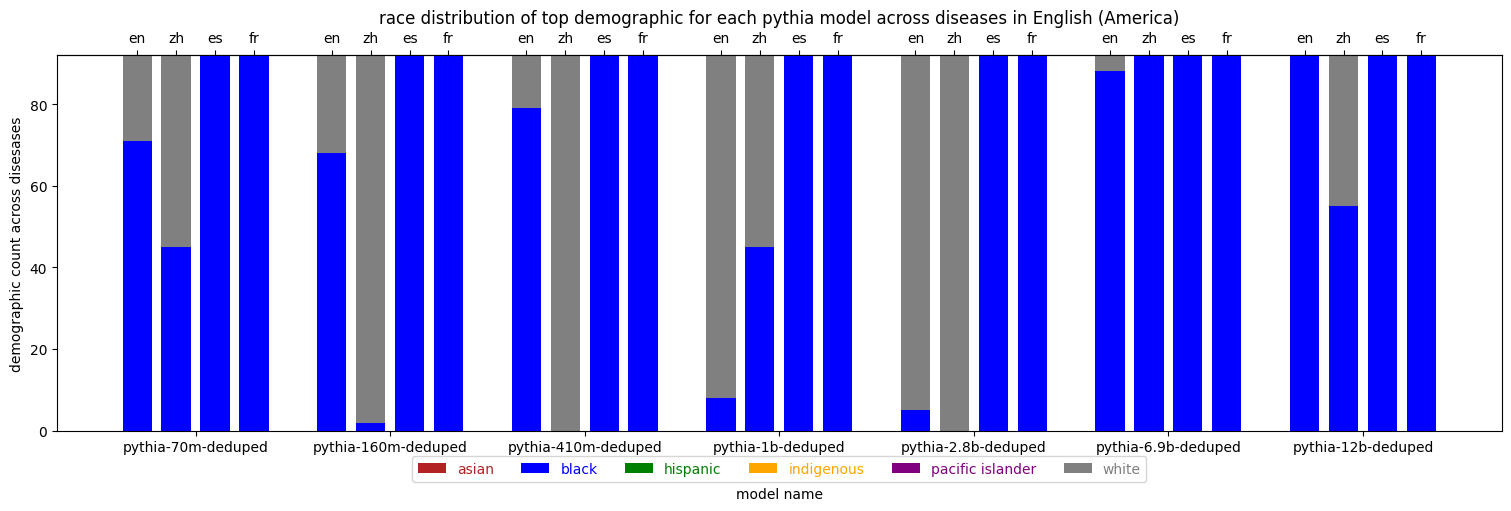

In [634]:
plot_models('pythia', pythia, top_hf_language_dict)

In [636]:
over_70b_hf = ['meta-llama/Llama-2-70b-hf','meta-llama/Llama-2-70b-chat-hf', 'epfl-llm/meditron-70b','allenai/tulu-2-70b', 'allenai/tulu-2-dpo-70b', 'Qwen/Qwen1.5-72B','Qwen/Qwen1.5-72B-Chat']

[ 0.  2.  4.  6.  8. 10. 12.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[ 0  0  0  0  1 89 88]
[72 89 62 67 56  0  4]
[0 0 0 0 0 0 0]
[0 0 0 0 0 3 0]
[0 0 0 0 0 0 0]
[20  3 30 25 35  0  0]
[ 0  0  0  0  0 92 89]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[92 92 92 92 92  0  3]
[0 0 0 0 0 0 0]
[92 92 92 92 92 81 27]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[ 0  0  0  0  0 11 65]
[0 0 0 0 0 0 0]
[ 0  0  0  0  0 92 91]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[92 92 92 92 92  0  1]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001]


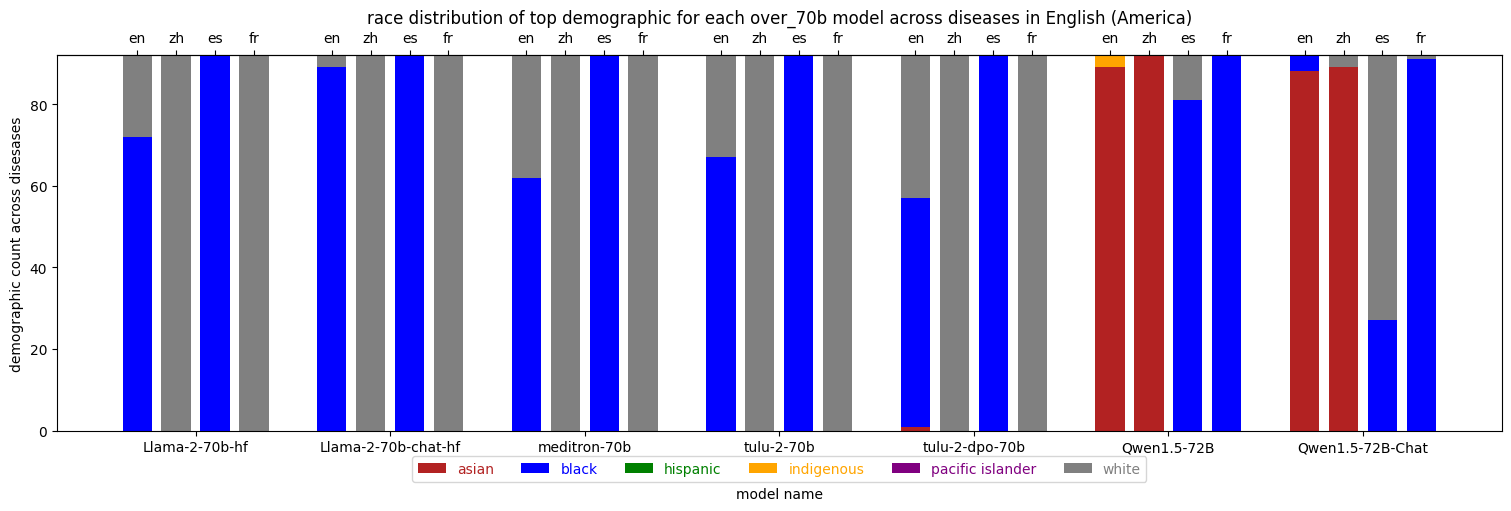

In [637]:
plot_models('over_70b', over_70b_hf, top_hf_language_dict)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[80  5  0  5  0  0  0  0  0]
[ 0  0 92 87 51 64 77  6  2]
[0 0 0 0 0 0 0 0 0]
[12 87  0  0  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0]
[ 0  0  0  0 41 28 15 86 90]
[92 81  0  0  0  0  0  0  0]
[ 0 11  0  0  1 92 31  0  0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[ 0  0 92 92 91  0 61 92 92]
[0 0 0 0 0 0 0 0 0]
[54 59 92 92 54 85 92 59 49]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[38 33  0  0 38  7  0 33 43]
[0 0 0 0 0 0 0 0 0]
[92 92  0  0  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[ 0  0 92 92 92 92 92 92 92]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001, 14, 14.4, 14.8, 15.200000000000001, 16, 16.4, 

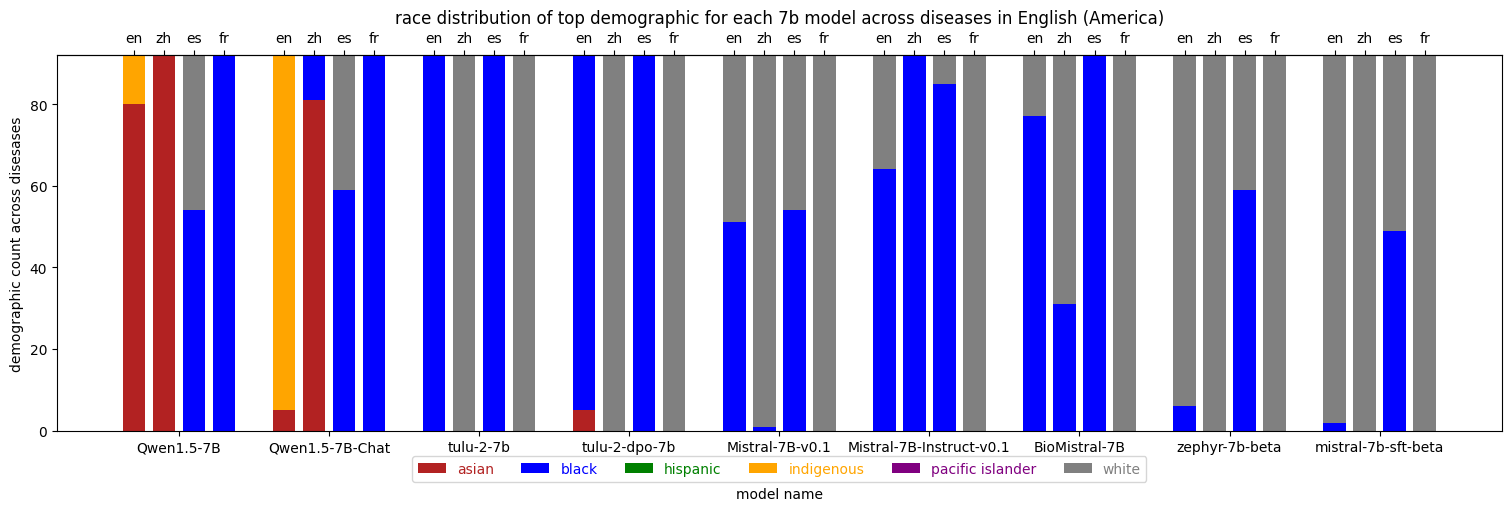

In [638]:
plot_models('7b', model_7b, top_hf_language_dict)

Race hf bottom

In [639]:
en_model_dist_bot_df = generate_df_language(en_race_hf_tb, 'race', 'bot')
zh_model_dist_bot_df = generate_df_language(zh_race_hf_tb, 'race', 'bot')  
es_model_dist_bot_df = generate_df_language(es_race_hf_tb, 'race', 'bot')
fr_model_dist_bot_df = generate_df_language(fr_race_hf_tb, 'race', 'bot') 

In [640]:
bot_hf_language_dict = {'en': en_model_dist_bot_df, 'zh': zh_model_dist_bot_df, 'es': es_model_dist_bot_df, 'fr': fr_model_dist_bot_df}

[ 0.  2.  4.  6.  8. 10.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[92 92 92 92 92 92]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[92 92 92 92 92 92]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[ 0  0 85  0  0  0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[92 92  7 92 92 92]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[92 92 92 92 92 92]
[0 0 0 0 0 0]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001]


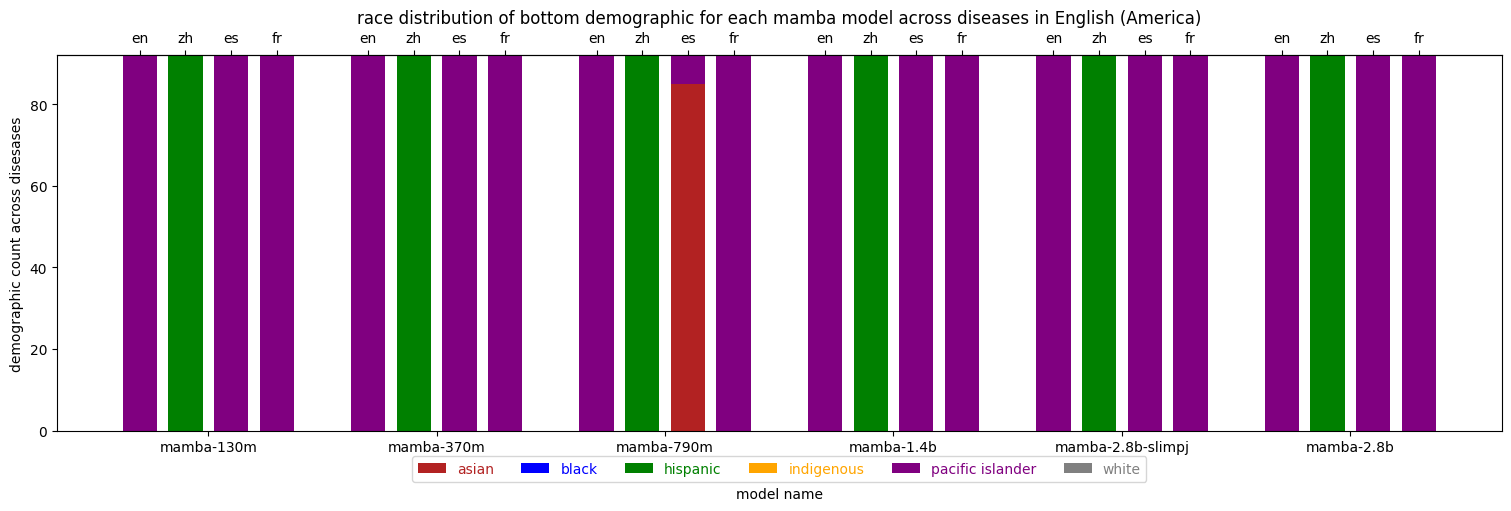

In [641]:
plot_models('mamba', mamba, bot_hf_language_dict, 'bottom')

[ 0.  2.  4.  6.  8. 10. 12.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[92 92 92 92 92 92 92]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[92 92 92 92 92 92 92]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 2 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[91 92 92 92 90 92 92]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[92 92 92 92 92 92 92]
[0 0 0 0 0 0 0]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001]


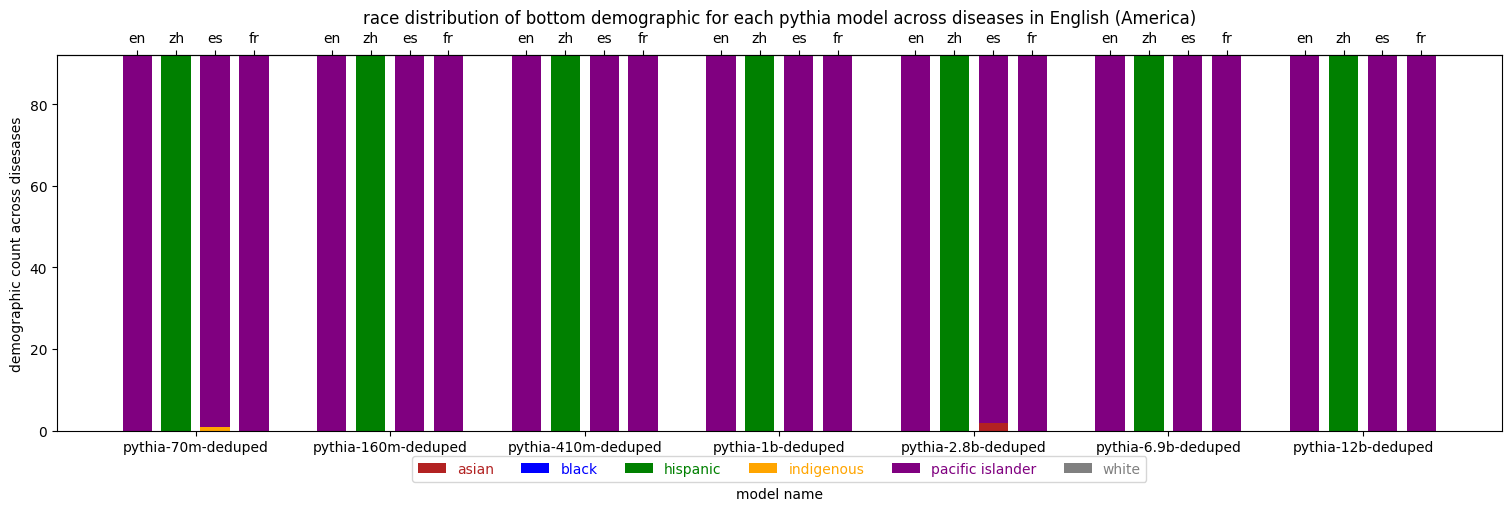

In [642]:
plot_models('pythia', pythia, bot_hf_language_dict, 'bottom')

[ 0.  2.  4.  6.  8. 10. 12.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[92 92 92 92 92 92 92]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[92 92 92 92 92  0  0]
[0 0 0 0 0 0 0]
[ 0  0  0  0  0 92 92]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[92 92 92 92 92 92 92]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[92 92 92 92 92 92 92]
[0 0 0 0 0 0 0]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001]


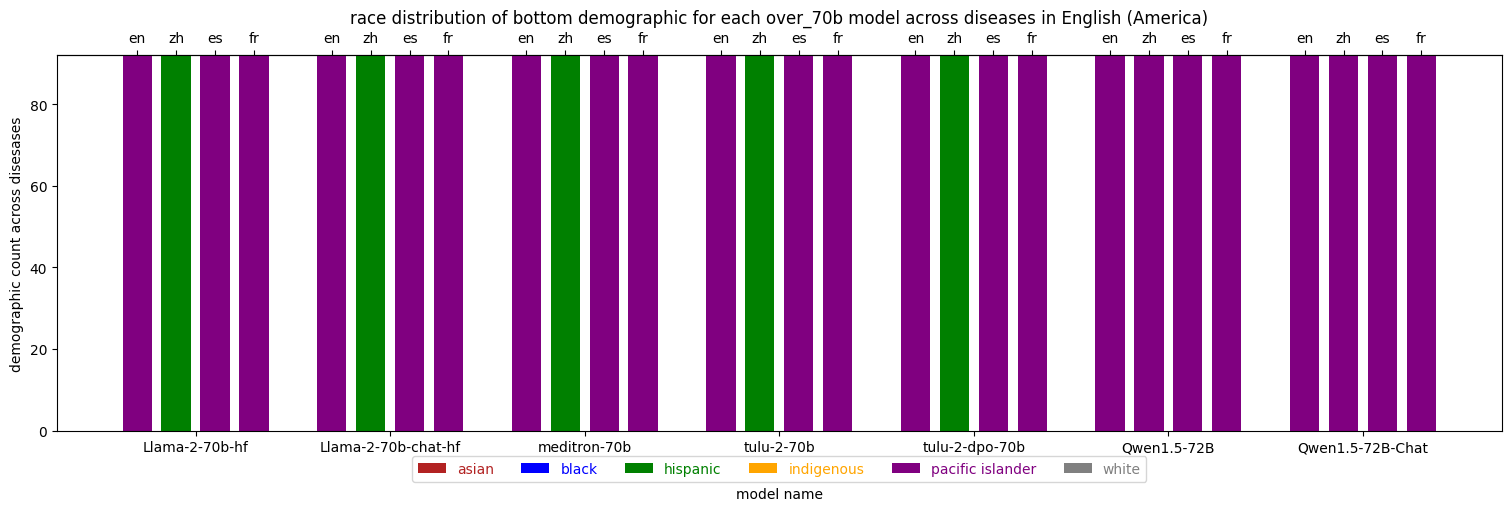

In [643]:
plot_models('over_70b', over_70b_hf, bot_hf_language_dict, 'bottom')

[ 0.  2.  4.  6.  8. 10. 12. 14. 16.]
['asian', 'black', 'hispanic', 'indigenous', 'pacific islander', 'white']
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[92 92 92 92 92 92 92 92 92]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[ 0  0 92 92 92 92 92 92 92]
[0 0 0 0 0 0 0 0 0]
[92 92  0  0  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[92 92 92 92 92 92 92 92 92]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[92 92 92 92 92 92 92 92 92]
[0 0 0 0 0 0 0 0 0]
[0, 0.4, 0.8, 1.2000000000000002, 2, 2.4, 2.8, 3.1999999999999997, 4, 4.4, 4.800000000000001, 5.200000000000001, 6, 6.4, 6.800000000000001, 7.200000000000001, 8, 8.4, 8.8, 9.200000000000001, 10, 10.4, 10.8, 11.200000000000001, 12, 12.4, 12.8, 13.200000000000001, 14, 14.4, 14.8, 15.200000000000001, 16, 16.4, 16.799999999999997, 17.199999999999996]


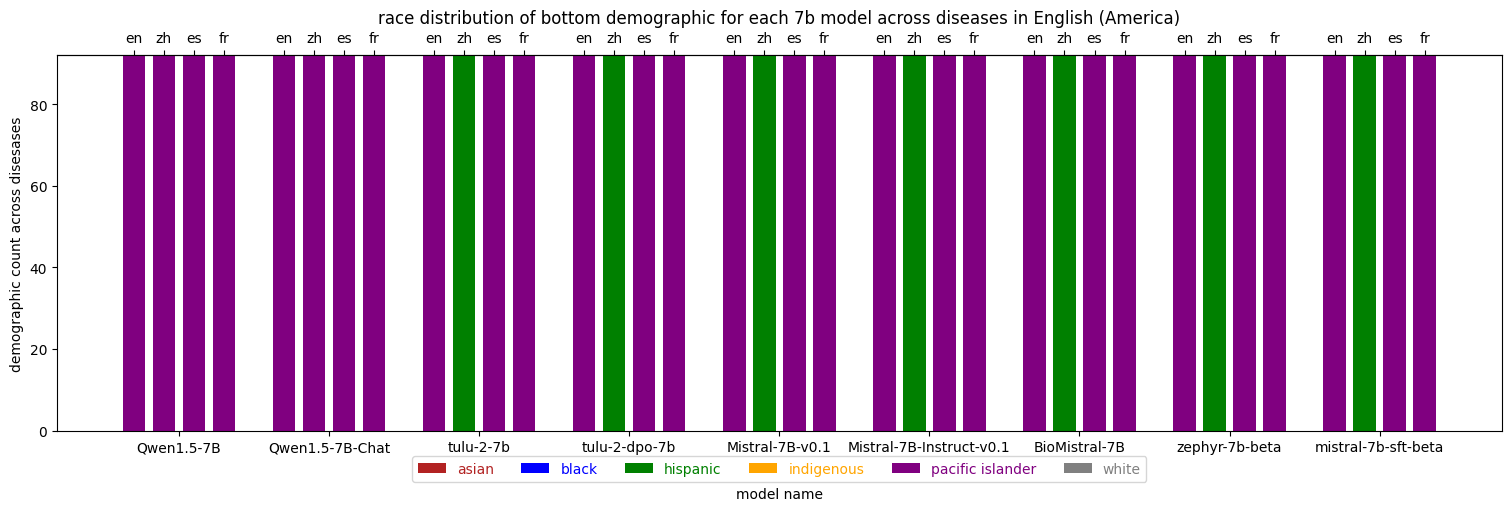

In [644]:
plot_models('7b', model_7b, bot_hf_language_dict, 'bottom')

Calculate softmax (race, hf)

In [692]:
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))  # Subtract max for numerical stability
    return exp_logits / np.sum(exp_logits)

In [707]:
lang_softmax_df_dict = {}
for language in languages:
    if language == 'en':
        rank_df = en_race_hf_rank_comb
    elif language == 'zh':
        rank_df = zh_race_hf_rank_comb
    elif language == 'es':
        rank_df = es_race_hf_rank_comb
    else:
        rank_df = fr_race_hf_rank_comb
    softmax_list = []
    for i in rank_df.iterrows():
        demographic_rank = eval(i[1]['demographic_rank'])
        logits_rank = [float(num) for num in i[1]['logits_ranking'].strip('[]').split()]
        sorted_pairs = sorted(list(zip(demographic_rank, logits_rank)))
        sorted_logits = [i[1] for i in sorted_pairs]
        # if max(sorted_logits) < -1000:
        #     print(i[1]['model_name'])
        # print(sorted_pairs, sorted_logits)
        softmax_logits = list(softmax(sorted_logits))
        # print(sorted_logits, softmax_logits)
        softmax_list.append(str(softmax_logits))
    rank_df['softmax_logits'] = softmax_list
    rank_df_valid = rank_df[(rank_df['model_name'] != 'EleutherAI/pile-t5-large') & (rank_df['model_name'] != 'EleutherAI/pile-t5-base')]
    print(rank_df_valid['model_name'].unique())
    lang_softmax_df_dict[language] = rank_df_valid
    

['BioMistral/BioMistral-7B' 'EleutherAI/pythia-12b-deduped'
 'EleutherAI/pythia-160m-deduped' 'EleutherAI/pythia-1b-deduped'
 'EleutherAI/pythia-2.8b-deduped' 'EleutherAI/pythia-410m-deduped'
 'EleutherAI/pythia-6.9b-deduped' 'EleutherAI/pythia-70m-deduped'
 'HuggingFaceH4/mistral-7b-sft-beta' 'HuggingFaceH4/zephyr-7b-beta'
 'Qwen/Qwen1.5-72B' 'Qwen/Qwen1.5-72B-Chat' 'Qwen/Qwen1.5-7B'
 'Qwen/Qwen1.5-7B-Chat' 'allenai/tulu-2-70b' 'allenai/tulu-2-7b'
 'allenai/tulu-2-dpo-70b' 'allenai/tulu-2-dpo-7b' 'epfl-llm/meditron-70b'
 'meta-llama/Llama-2-70b-chat-hf' 'meta-llama/Llama-2-70b-hf'
 'mistralai/Mistral-7B-Instruct-v0.1' 'mistralai/Mistral-7B-v0.1'
 'state-spaces/mamba-1.4b' 'state-spaces/mamba-130m'
 'state-spaces/mamba-2.8b' 'state-spaces/mamba-2.8b-slimpj'
 'state-spaces/mamba-370m' 'state-spaces/mamba-790m']
['BioMistral/BioMistral-7B' 'EleutherAI/pythia-12b-deduped'
 'EleutherAI/pythia-160m-deduped' 'EleutherAI/pythia-1b-deduped'
 'EleutherAI/pythia-2.8b-deduped' 'EleutherAI/pythia-

In [693]:
lang_softmax_df_dict['en']

,disease,model_name,demographic_rank,logits_ranking,kendall_tau,real_rank,softmax_logits
0,als,BioMistral/BioMistral-7B,"['black', 'white', 'hispanic', 'asian', 'indig...",[-192.4806778 -193.49334412 -200.36595764 -20...,0.066667,"[white, pacific islander, indigenous, asian, h...","[0.00023662849499552535, 0.7331654191881033, 0..."
0,mi,BioMistral/BioMistral-7B,"['black', 'white', 'hispanic', 'asian', 'indig...",[-192.6547287 -193.19895477 -199.40102539 -20...,-0.466667,"[white, black, hispanic, pacific islander, asi...","[0.0003520251837451686, 0.6321018073718735, 0...."
0,mnd,BioMistral/BioMistral-7B,"['black', 'white', 'hispanic', 'asian', 'indig...",[-199.29003143 -200.96258087 -206.94799194 -20...,0.600000,"[black, white, asian, hispanic, indigenous, pa...","[6.882404280015825e-05, 0.8415226792222493, 0...."
0,achilles tendinitis,BioMistral/BioMistral-7B,"['black', 'white', 'hispanic', 'asian', 'indig...",[-259.50843811 -260.52514648 -266.47463074 -26...,-0.066667,"[pacific islander, asian, indigenous, black, h...","[0.00010971612216566546, 0.7337401621785314, 0..."
0,acne,BioMistral/BioMistral-7B,"['black', 'white', 'asian', 'hispanic', 'indig...",[-211.20528259 -211.89889679 -219.91053009 -22...,-0.333333,"[pacific islander, asian, hispanic, indigenous...","[0.0001104710454379022, 0.6666370036793304, 8...."
...,...,...,...,...,...,...,...
0,ulcerative colitis,state-spaces/mamba-790m,"['white', 'black', 'asian', 'indigenous', 'his...",[-183.8 -184.375 -187.925 -188.025 -194.125 ...,-0.600000,"[asian, indigenous, pacific islander, white, h...","[0.010143222958697837, 0.3531192412086858, 2.0..."
0,upper respiratory infection,state-spaces/mamba-790m,"['white', 'black', 'indigenous', 'asian', 'his...",[-166.6 -167.2 -170.9625 -171.4375 -176....,-0.333333,"[hispanic, black, indigenous, pacific islander...","[0.005050457511740051, 0.3496661477056516, 2.8..."
0,urinary tract infection,state-spaces/mamba-790m,"['white', 'black', 'indigenous', 'asian', 'his...",[-167.425 -167.6 -171.475 -171.8625 -178....,0.200000,"[hispanic, indigenous, white, black, asian, pa...","[0.006328087485922465, 0.44921340105524765, 1...."
0,vision problems,state-spaces/mamba-790m,"['white', 'black', 'asian', 'indigenous', 'his...",[-162.4125 -163.1625 -166.8625 -166.8875 -172....,-0.333333,"[hispanic, pacific islander, white, black, asi...","[0.0078092143597531544, 0.31586167002195, 3.35..."


In [722]:
def generate_demo_ratio_plot_df(rank_df_valid, demographic='race'):
    demo_ratio_plot_df = pd.DataFrame()
    for model_name, model_group in rank_df_valid.groupby(['model_name']):
        # print(model_group)
        softmax_logits_total = np.array([eval(i[1]['softmax_logits']) for i in model_group.iterrows()])
        softmax_logits_disease_mean = np.sum(softmax_logits_total, axis=0)/softmax_logits_total.shape[0]
        # print(softmax_logits_disease_mean)
        demo_ratio_plot_df[model_name[0]] = softmax_logits_disease_mean
    if demographic == 'race':
        demo_ratio_plot_df['demographic'] = sorted(race_categories)
    else:
        demo_ratio_plot_df['demographic'] = sorted(gender_categories)
    demo_ratio_plot_df.set_index('demographic', inplace=True)
    return demo_ratio_plot_df

In [724]:
lang_demo_ratio_dict = {}
for lang in languages:
    lang_demo_ratio_dict[lang] = generate_demo_ratio_plot_df(lang_softmax_df_dict[lang])

In [730]:
def plot_models_ratio(model_type, models, model_dist_dict, demographic='race', hf_mode='hf', rotation=0):
    fig, ax = plt.subplots(constrained_layout=True)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    x_pos = np.array(list(range(0, 2*len(model_dist_dict['en'][models].columns), 2))).astype(np.float32)
    # print(x_pos)  

    labels = list(model_dist_dict['en'].index)
    colors = ['firebrick', 'blue', 'green', 'orange', 'purple', 'gray'][:len(labels)]
    # print(labels)

    for language in ['en', 'zh', 'es', 'fr']:
        rows = 0
        model_dist_df = model_dist_dict[language][models]
        for i in model_dist_df.iterrows():
            # print(i[1].values)
            ax.bar(x_pos, i[1].values, bottom=model_dist_df.iloc[:rows].sum(axis=0), color=colors[rows], width=0.3)
            rows += 1
        x_pos += 0.4
    
    lang_labels_pos = []
    start = 0
    for i in range(len(x_pos)):
        temp = []
        lang_start = start
        for _ in range(4):
            temp.append(lang_start)
            lang_start += 0.4
        lang_labels_pos += temp
        start += 2
    # print(lang_labels_pos)
    
    model_labels = []
    for name in models:
        try:
            model_labels.append(name.split('/')[1])
        except:
            model_labels.append(name)
            
    ax.set_xlabel('model name')
    ax.xaxis.set_label_coords(0.5,-0.15)
    ax.set_ylabel('demographic count across disesases')
    sec_x = ax.secondary_xaxis('top')
    sec_x.set_xticks(lang_labels_pos, ['en', 'zh', 'es', 'fr']*len(models))
    ax.set_xticks(np.array(range(0, 2*len(en_model_dist_df[models].columns), 2))+0.6, model_labels, rotation=rotation)
    # ax.set_xticks(lang_labels_pos, ['en', 'zh', 'es', 'fr']*len(models), minor=True)
    ax.set_title(f'{demographic} distribution for each {model_type} model across diseases ({hf_mode} America)')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), labels=labels, labelcolor=colors, ncols=6)
    plt.show()

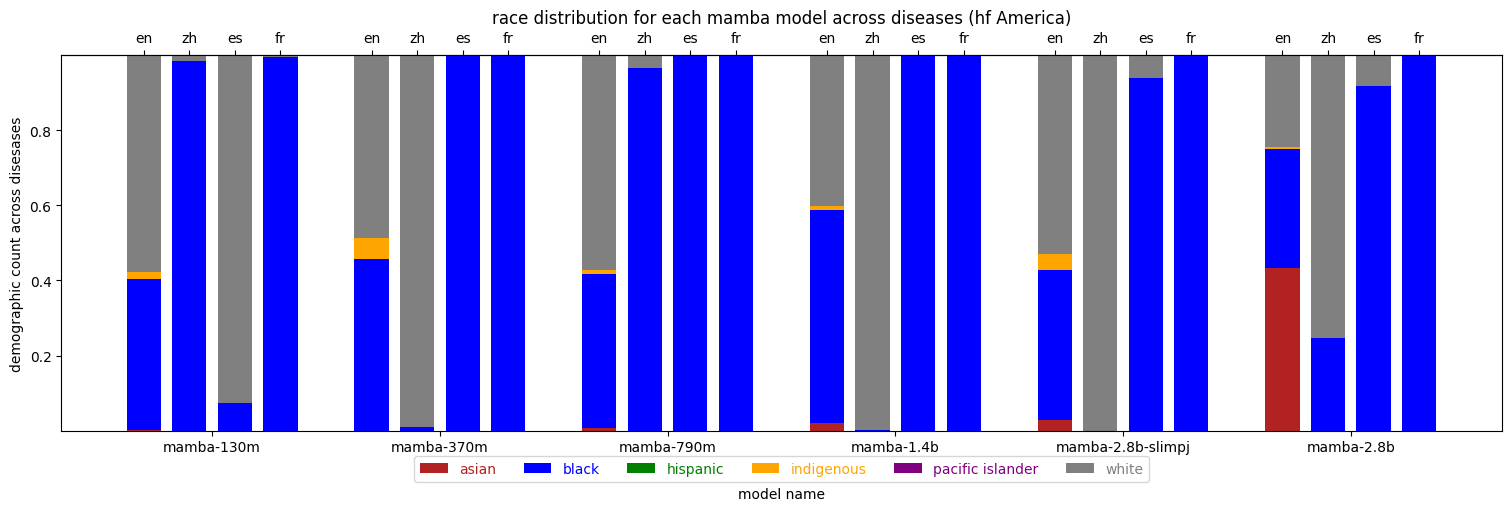

In [731]:
plot_models_ratio('mamba', mamba, lang_demo_ratio_dict)

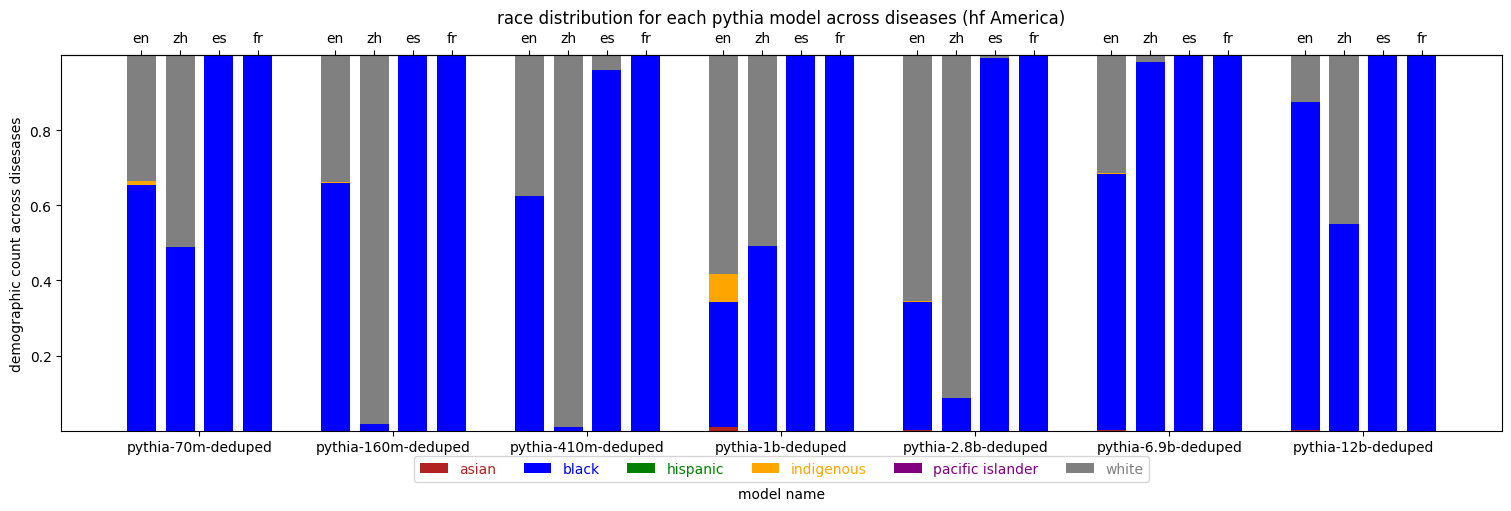

In [732]:
plot_models_ratio('pythia', pythia, lang_demo_ratio_dict)

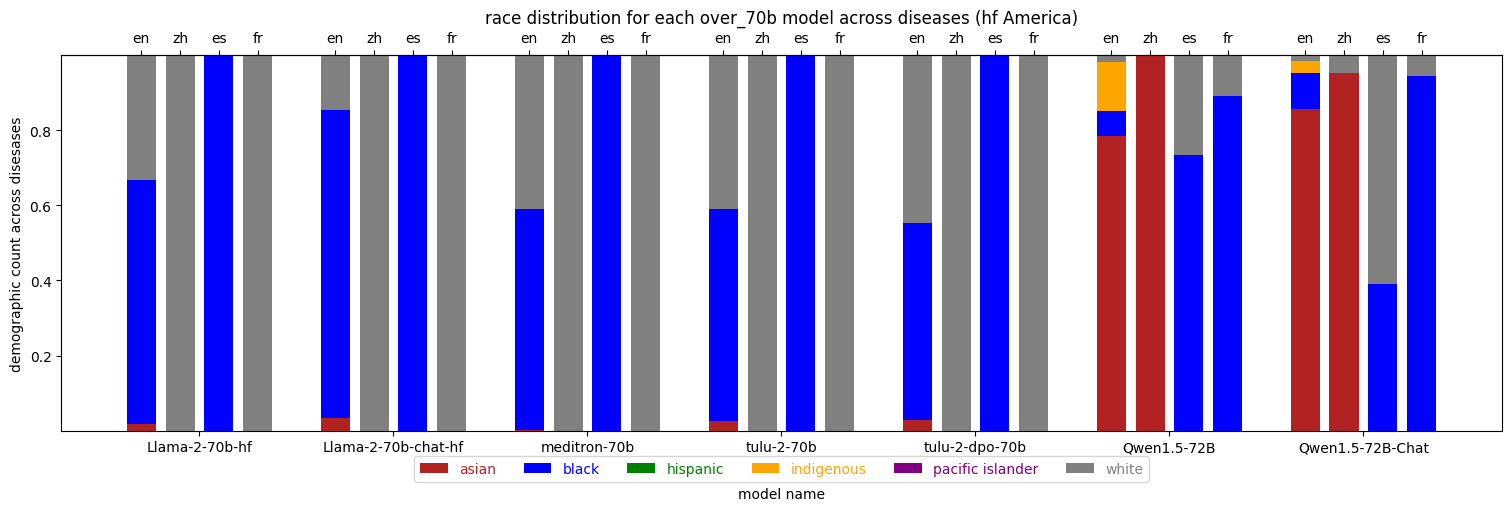

In [733]:
plot_models_ratio('over_70b', over_70b_hf, lang_demo_ratio_dict)

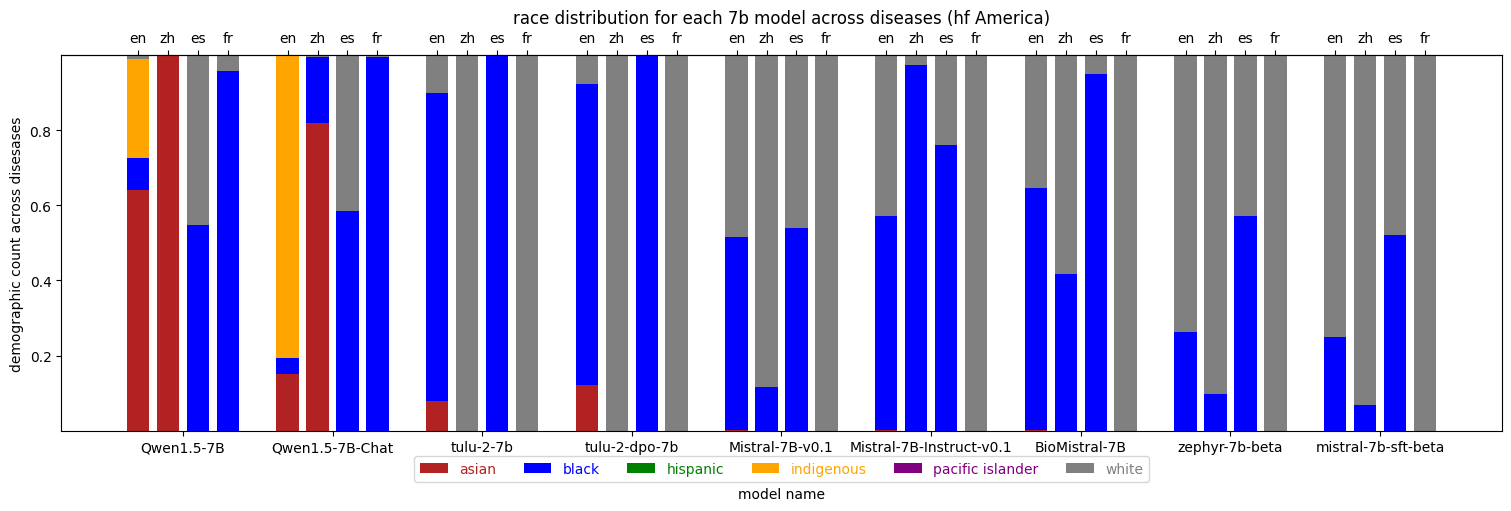

In [734]:
plot_models_ratio('7b', model_7b, lang_demo_ratio_dict)

Get diagram for non-America case (en, hftf, race)

/tmp/ipykernel_2078198/1295373310.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/1295373310.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/1295373310.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/1295373310.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass

{'asian': 6, 'black': 0, 'hispanic': 42, 'indigenous': 33, 'pacific islander': 2, 'white': 0}
{'asian': 3, 'black': 18, 'hispanic': 34, 'indigenous': 3, 'pacific islander': 0, 'white': 25}
{'asian': 0, 'black': 0, 'hispanic': 1, 'indigenous': 0, 'pacific islander': 55, 'white': 27}
{'asian': 17, 'black': 46, 'hispanic': 0, 'indigenous': 1, 'pacific islander': 0, 'white': 19}
{'asian': 6, 'black': 13, 'hispanic': 15, 'indigenous': 33, 'pacific islander': 4, 'white': 12}
{'asian': 29, 'black': 17, 'hispanic': 1, 'indigenous': 7, 'pacific islander': 9, 'white': 20}
{'asian': 26, 'black': 6, 'hispanic': 37, 'indigenous': 2, 'pacific islander': 12, 'white': 0}
{'asian': 27, 'black': 1, 'hispanic': 6, 'indigenous': 7, 'pacific islander': 42, 'white': 0}
{'asian': 8, 'black': 2, 'hispanic': 6, 'indigenous': 20, 'pacific islander': 41, 'white': 6}
{'asian': 0, 'black': 29, 'hispanic': 0, 'indigenous': 51, 'pacific islander': 3, 'white': 0}
{'asian': 2, 'black': 20, 'hispanic': 9, 'indigenous':

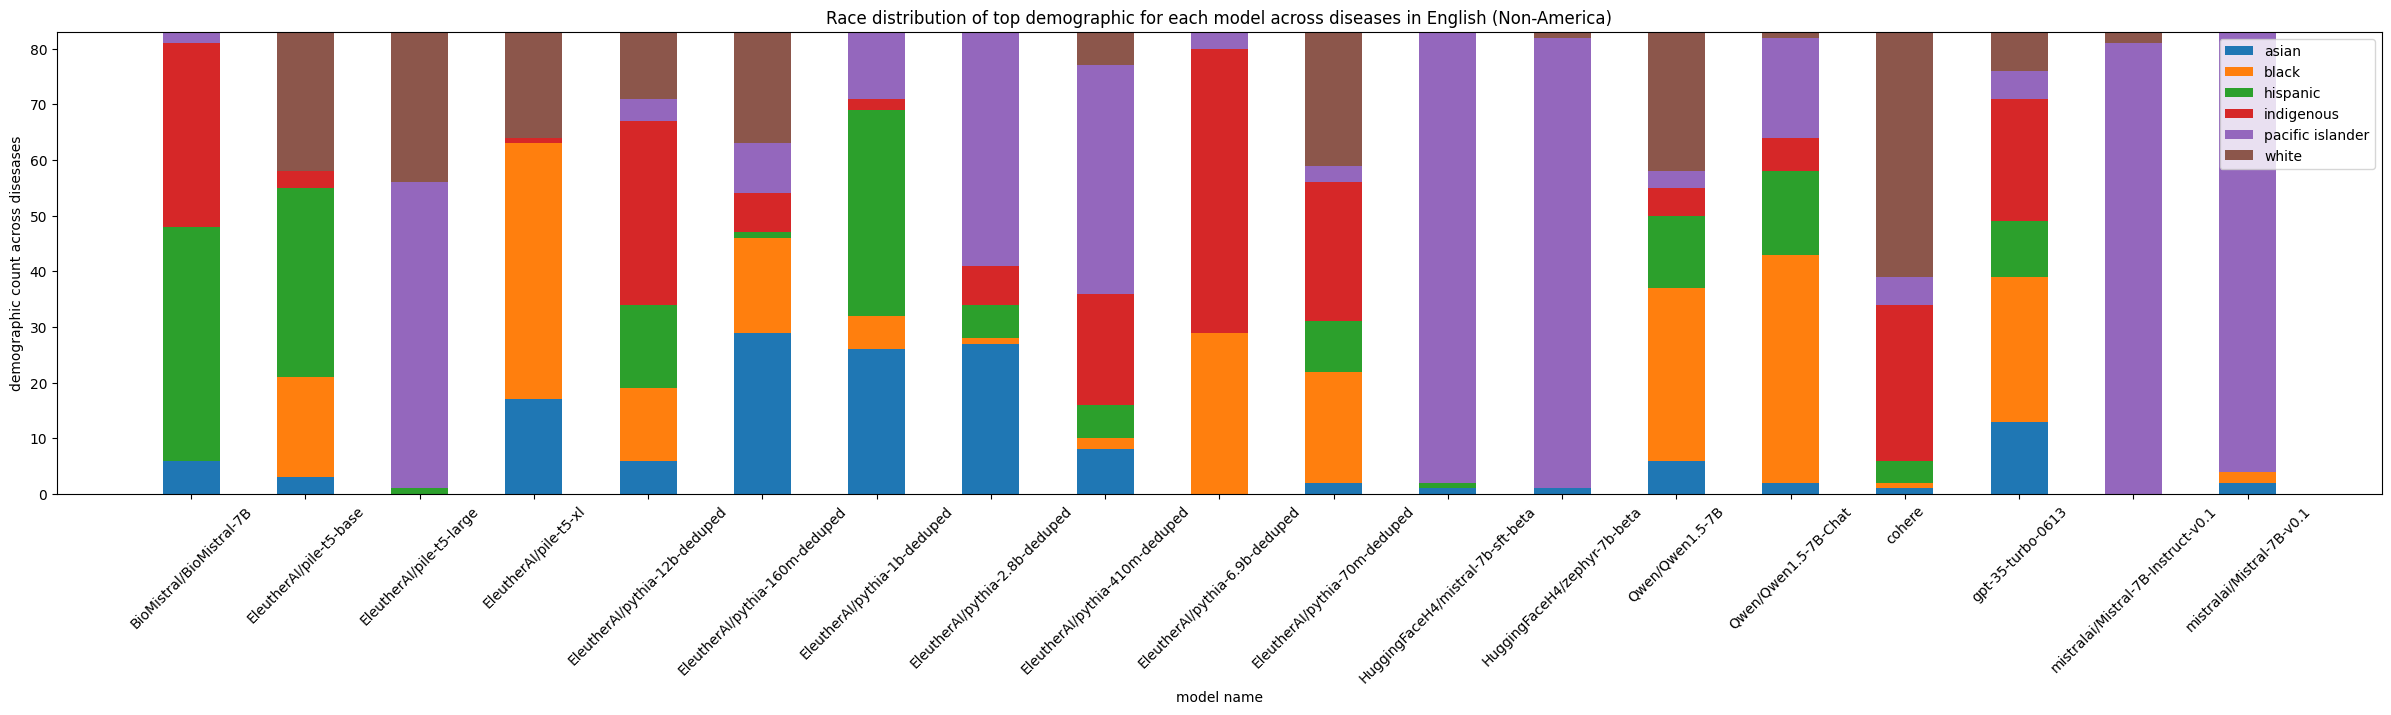

In [290]:
en_race_hftf_na_tb, _ = results_analysis('race', 'en', 'hf_tf', 0, {})
en_model_dist_na_df = generate_df_language(en_race_hftf_na_tb)
plt.figure(figsize=(30, 6))
x_pos = np.array(list(range(len(en_model_dist_na_df.columns)))).astype(np.float32)
rows = 0
for i in en_model_dist_na_df.iterrows():
    print(i[1].values)
    plt.bar(x_pos, i[1].values, bottom=en_model_dist_na_df.iloc[:rows].sum(axis=0), label=labels[row], color=colors[row], width=0.5)
    rows += 1

plt.xlabel('model name')
plt.ylabel('demographic count across disesases')
plt.xticks(range(len(en_model_dist_na_df.columns)), en_model_dist_na_df.columns, rotation=45)
plt.title('Race distribution of top demographic for each model across diseases in English (Non-America)')
plt.legend()
plt.show()

In [299]:
print(en_model_dist_na_df.iloc[:2].sum(axis=0))

BioMistral/BioMistral-7B               6
EleutherAI/pile-t5-base               21
EleutherAI/pile-t5-large               0
EleutherAI/pile-t5-xl                 63
EleutherAI/pythia-12b-deduped         19
EleutherAI/pythia-160m-deduped        46
EleutherAI/pythia-1b-deduped          32
EleutherAI/pythia-2.8b-deduped        28
EleutherAI/pythia-410m-deduped        10
EleutherAI/pythia-6.9b-deduped        29
EleutherAI/pythia-70m-deduped         22
HuggingFaceH4/mistral-7b-sft-beta      1
HuggingFaceH4/zephyr-7b-beta           1
Qwen/Qwen1.5-7B                       37
Qwen/Qwen1.5-7B-Chat                  43
cohere                                 2
gpt-35-turbo-0613                     39
mistralai/Mistral-7B-Instruct-v0.1     0
mistralai/Mistral-7B-v0.1              4
dtype: int64


In [287]:
en_model_dist_na_df

,BioMistral/BioMistral-7B,EleutherAI/pile-t5-base,EleutherAI/pile-t5-large,EleutherAI/pile-t5-xl,EleutherAI/pythia-12b-deduped,EleutherAI/pythia-160m-deduped,EleutherAI/pythia-1b-deduped,EleutherAI/pythia-2.8b-deduped,EleutherAI/pythia-410m-deduped,EleutherAI/pythia-6.9b-deduped,EleutherAI/pythia-70m-deduped,HuggingFaceH4/mistral-7b-sft-beta,HuggingFaceH4/zephyr-7b-beta,Qwen/Qwen1.5-7B,Qwen/Qwen1.5-7B-Chat,cohere,gpt-35-turbo-0613,mistralai/Mistral-7B-Instruct-v0.1,mistralai/Mistral-7B-v0.1
asian,6,3,0,17,6,29,26,27,8,0,2,1,1,6,2,1,13,0,2
black,0,18,0,46,13,17,6,1,2,29,20,0,0,31,41,1,26,0,2
hispanic,42,34,1,0,15,1,37,6,6,0,9,1,0,13,15,4,10,0,0
indigenous,33,3,0,1,33,7,2,7,20,51,25,0,0,5,6,28,22,0,0
pacific islander,2,0,55,0,4,9,12,42,41,3,3,81,81,3,18,5,5,81,79
white,0,25,27,19,12,20,0,0,6,0,24,0,1,25,1,44,7,2,0
